**MAKİNE ÖĞRENMESİ İLE MAAŞ TAHMİNİ**

**İş Problemi:** Maaş bilgileri ve 1986 yılına ait kariyer istatistikleri paylaşılan beyzbol oyuncularının maaş tahminleri için bir makine öğrenmesi modeli geliştiriniz.

**Görevler:**
Veri ön işleme,
Özellik mühendisliği



In [ ]:
# NOT:Makine öğrenmesi yöntemlerinden biri olan Supervised Learning'i uygulayacağız çünkü görevimiz belirlenmiş maaş tahmini yapmak ve maaş bilgisi bize verilmiş
# yani bizim bir etiketimiz(label) var

# NOT: Regresyon modeli kuracağız çünkü bağımlı değişkenimiz(salary) numerik

In [ ]:
# Gerekli Kütüphane ve Fonksiyonlar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", lambda x: "%.2f" % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from helpers import *  # Tüm kullanacağım fonksiyonları helpers dosyasına attım. * işareti helpers'ın içindeki fonk. çağırmak için kullanılır.

In [ ]:
df = pd.read_csv(r"hitters.csv")
check_df(df)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head #####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    32

In [ ]:
# NOT: 0.5 değeri ortalamayı değil medyan değerlerini verir.
# NOT: Değişkenlerin quantiles değerleri arasındaki fark çoksa aykırı değer(outlier) olabilir yorumunu yapabiliriz.

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [ ]:
print(cat_cols)
print(num_cols)

['League', 'Division', 'NewLeague']
['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']


GELİŞMİŞ FONKSİYONEL KEŞİFÇİ VERİ ANALİZİ (ADVANCED FUNCTIONAL EDA)


In [ ]:
# Veri Ön İşleme

# 1. Outliers (Aykırı Değerler)
# 2. Missing Values (Eksik Değerler)
# 3. Feature Extraction (Özellik Çıkarımı)
# 4. Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)
# 5. Feature Scaling (Özellik Ölçeklendirme)

In [ ]:
# 1. Outliers (Aykırı Değerler)

In [ ]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun True
Runs True
RBI True
Walks True
Years True
CAtBat True
CHits True
CHmRun True
CRuns True
CRBI True
CWalks True
PutOuts True
Assists True
Errors True
Salary True


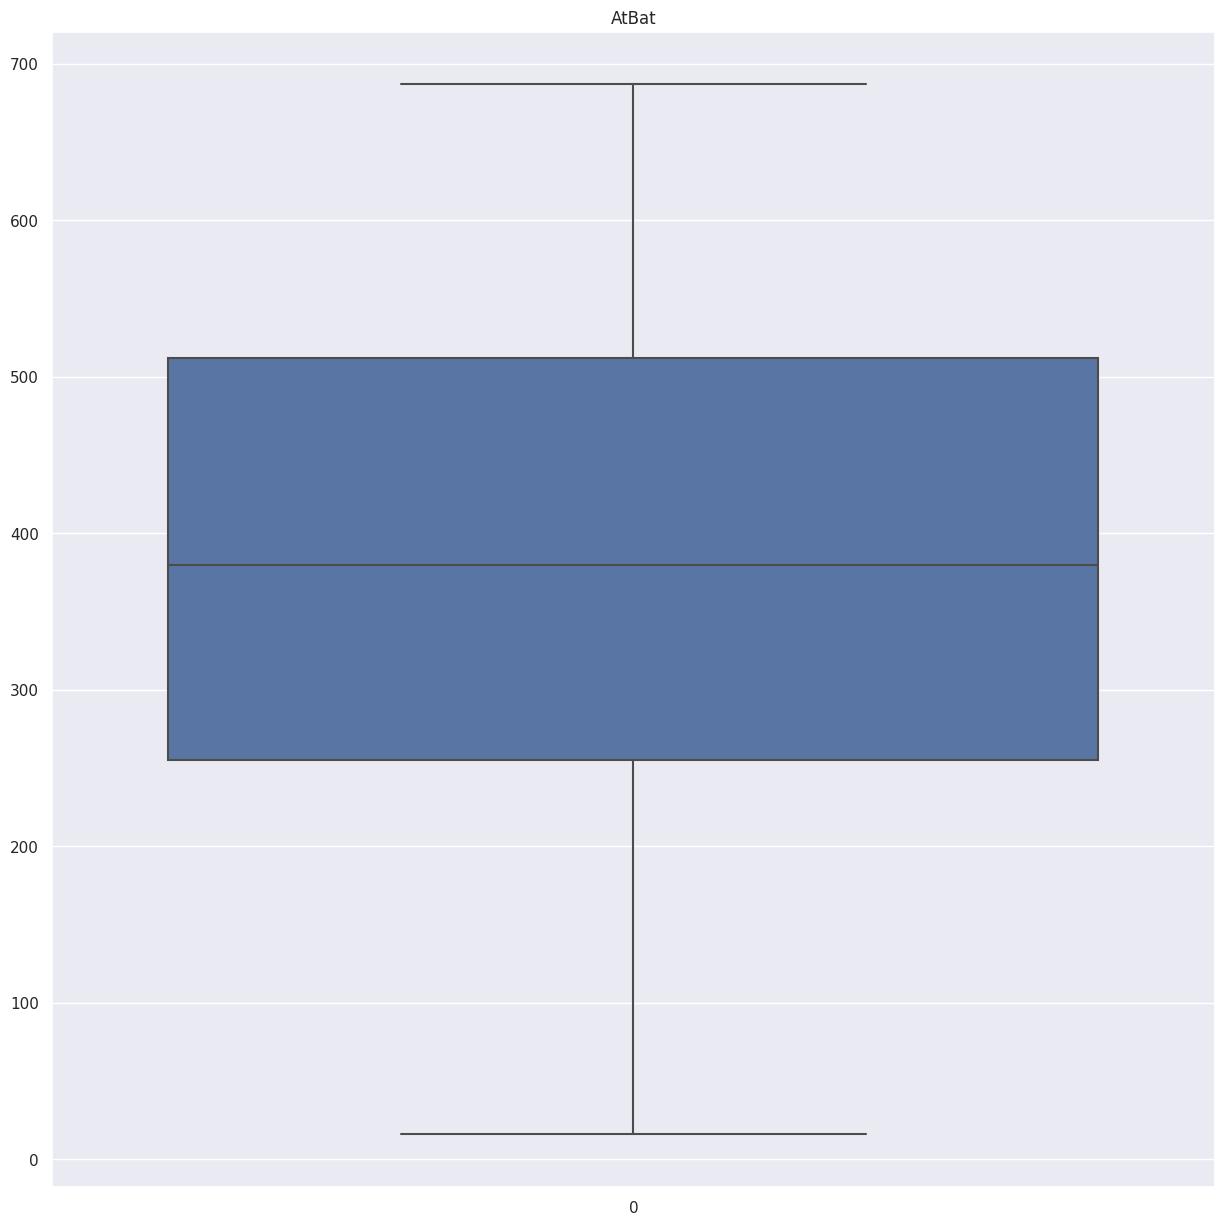

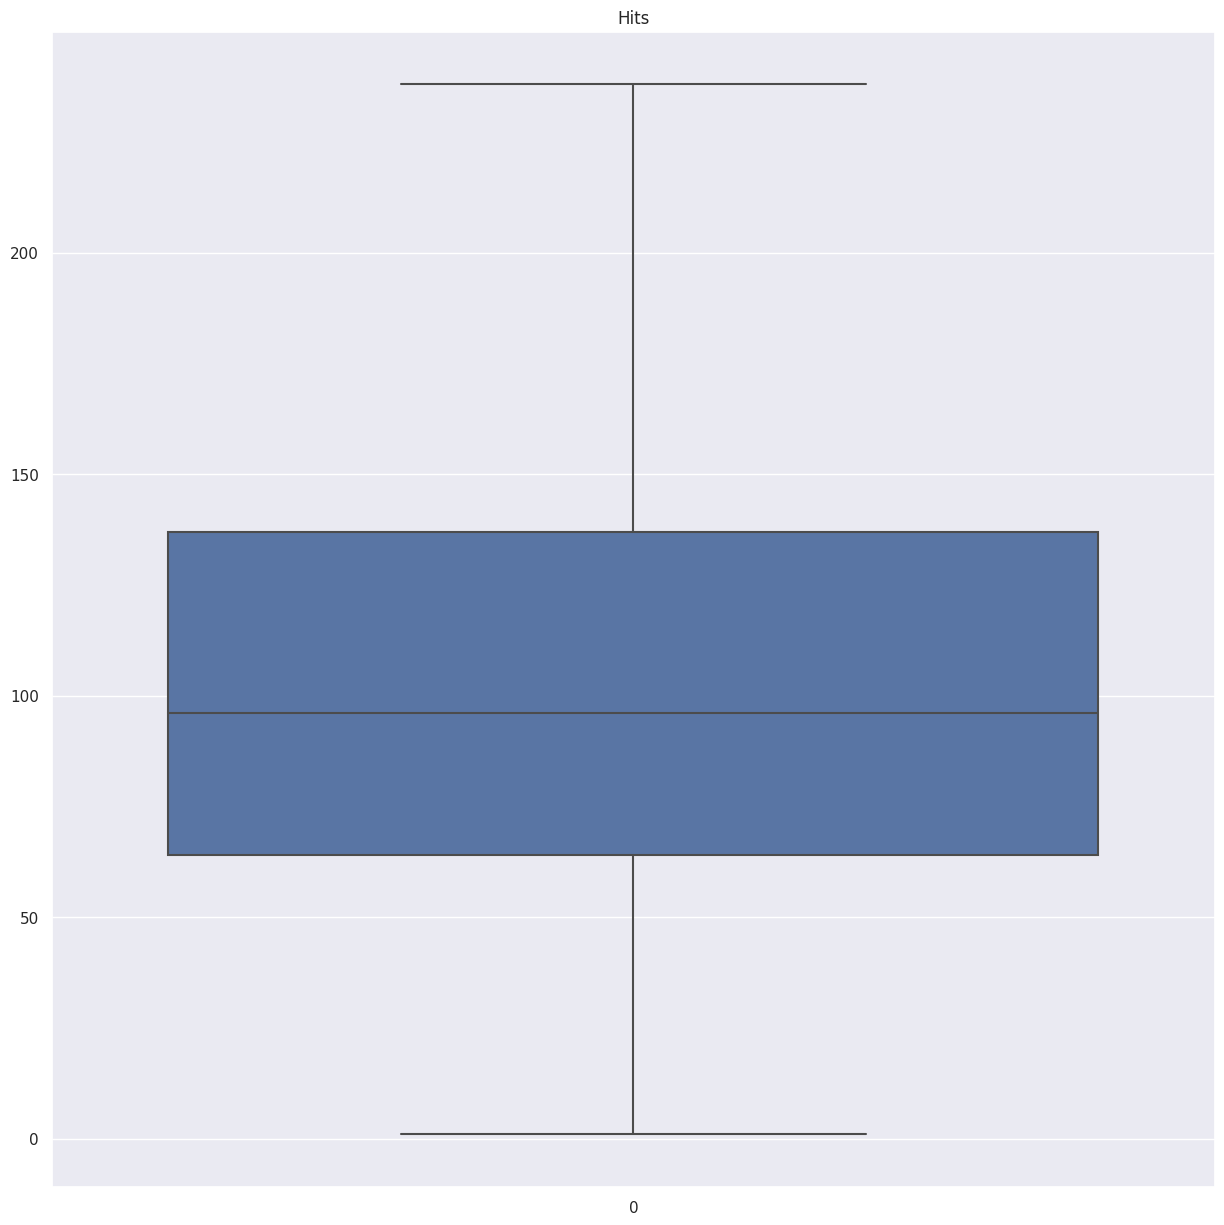

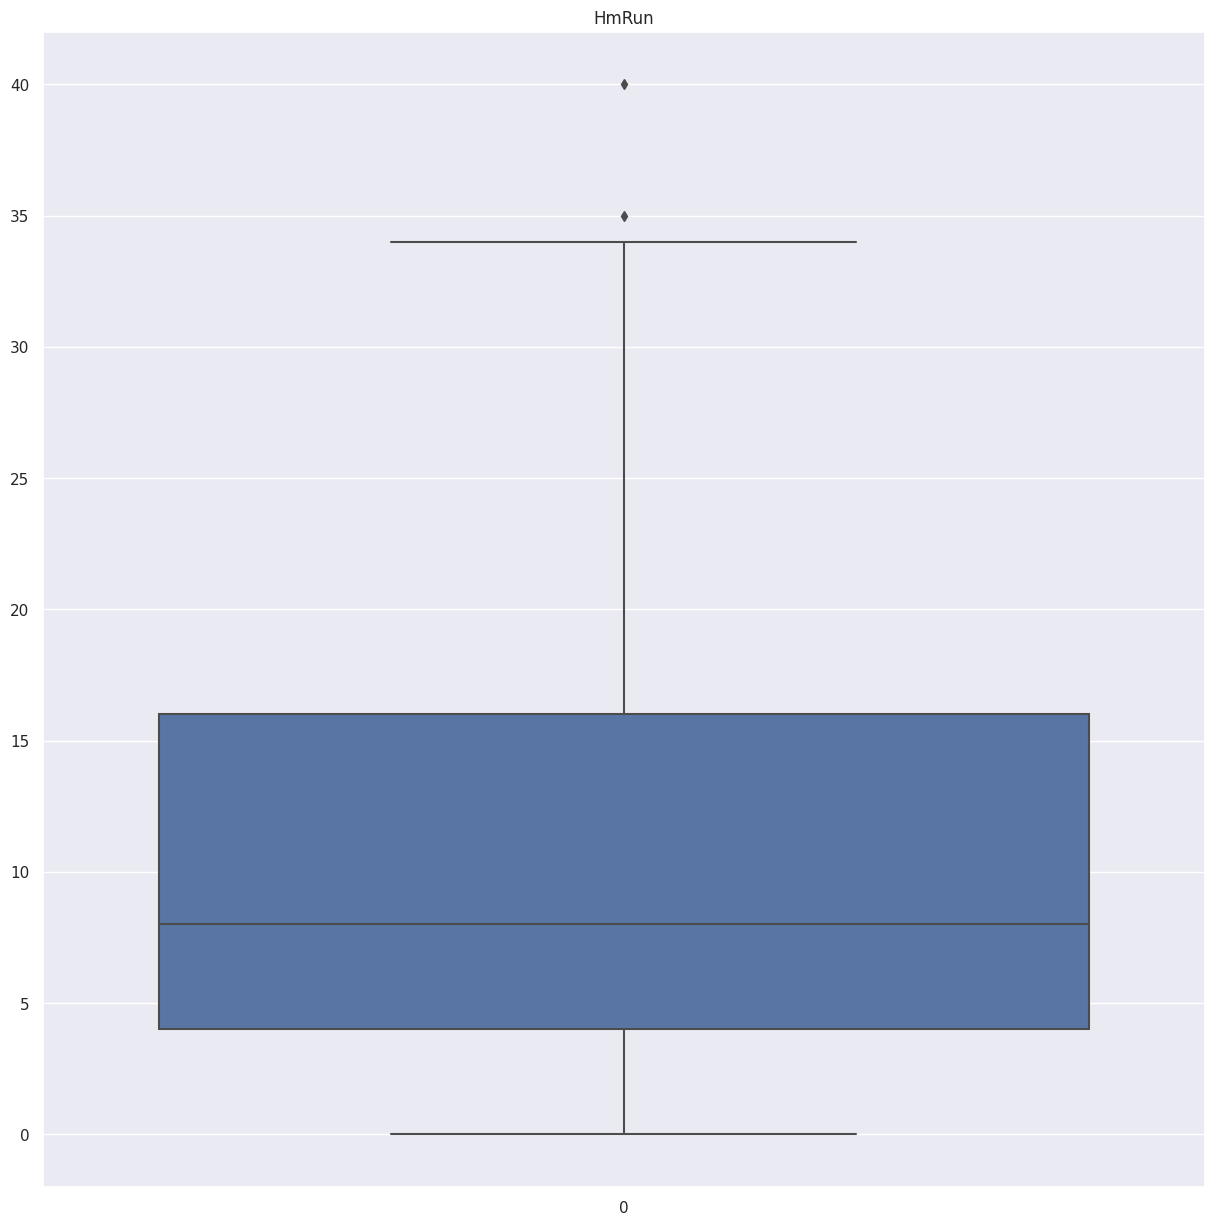

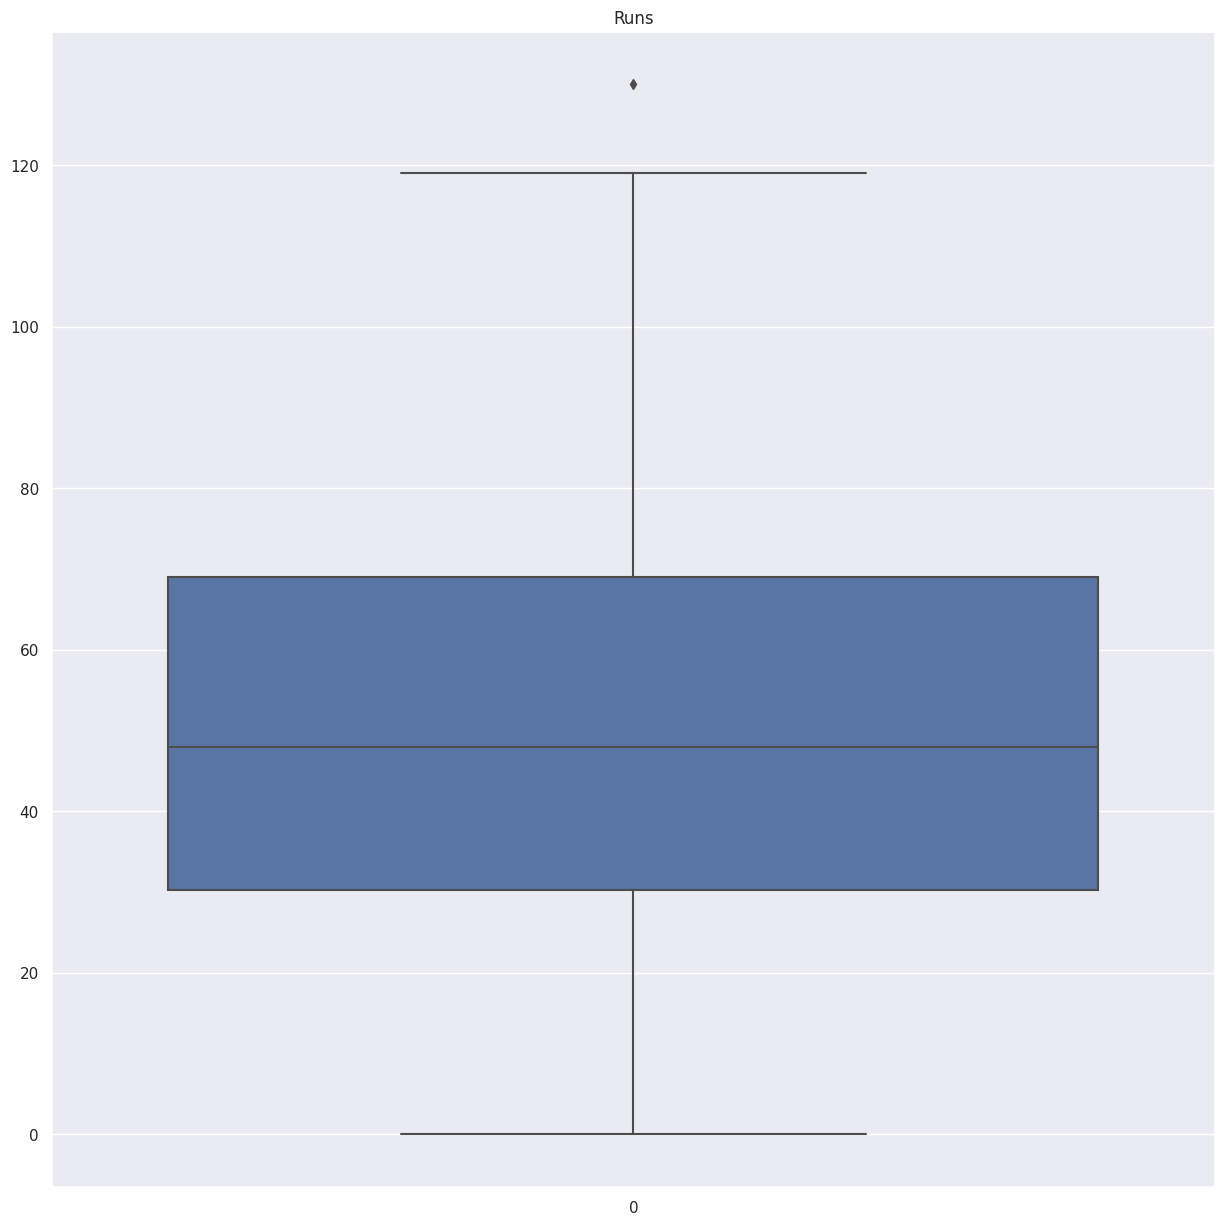

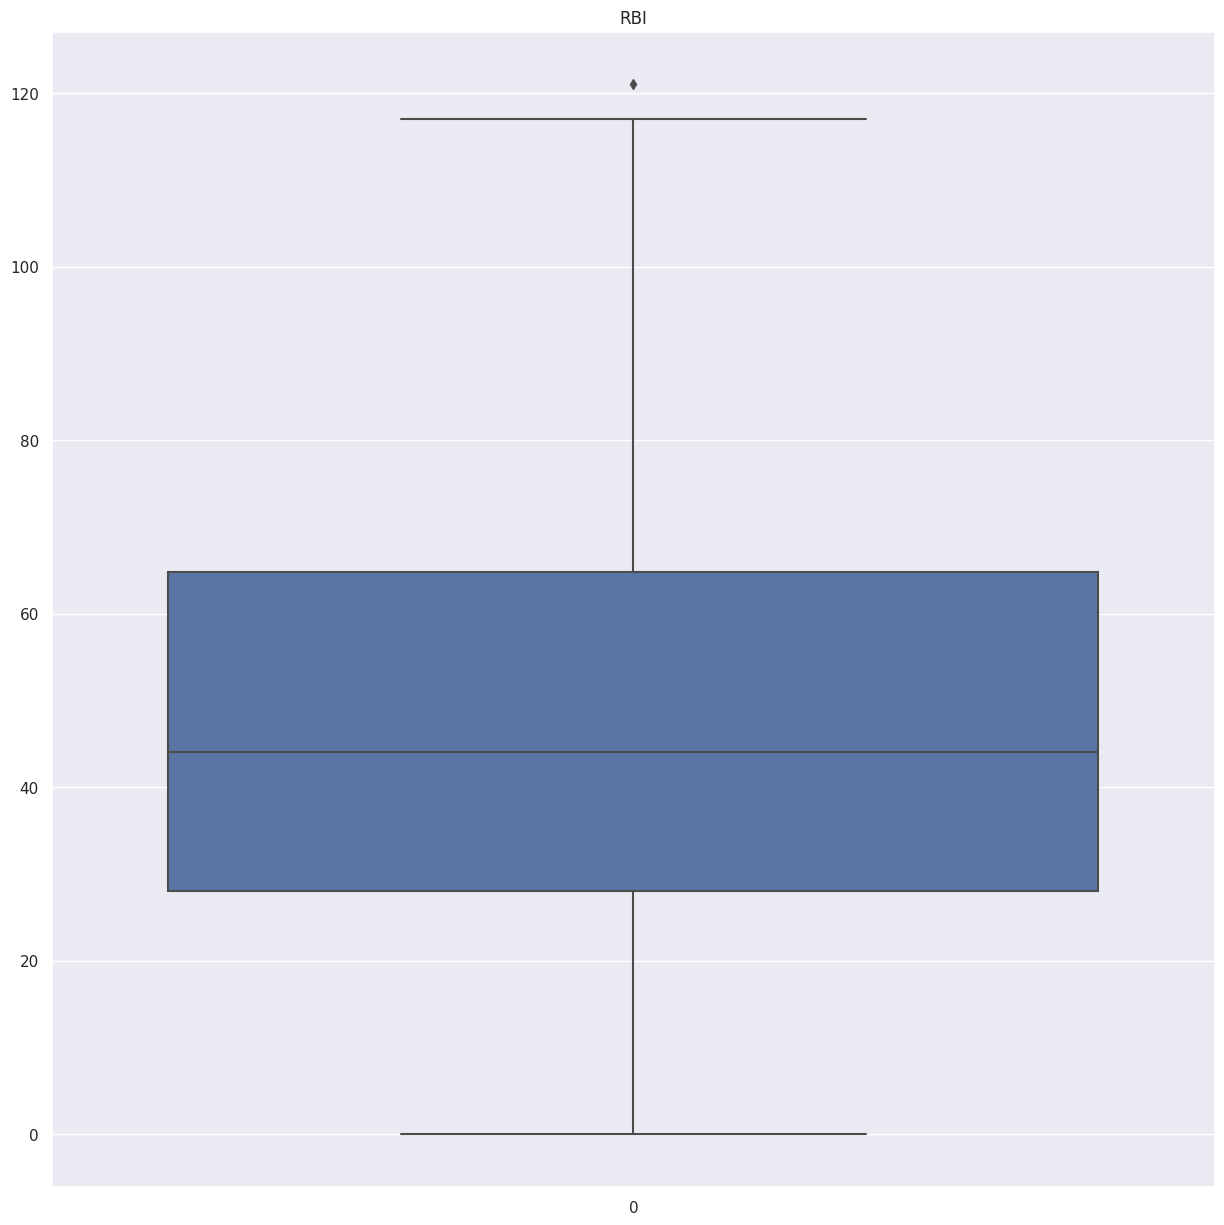

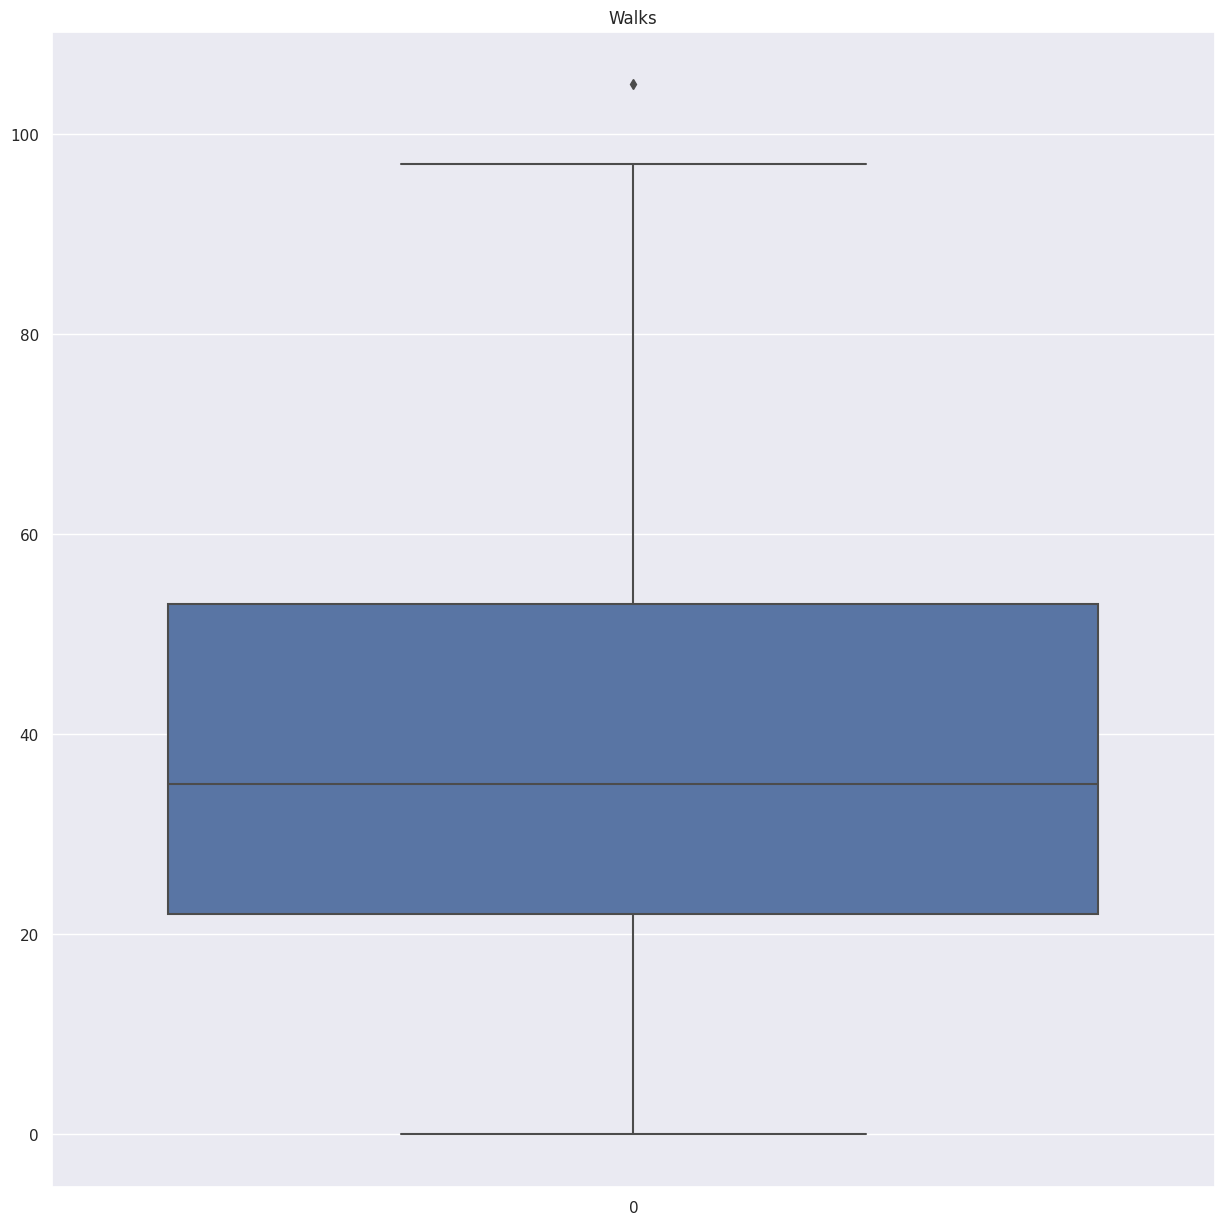

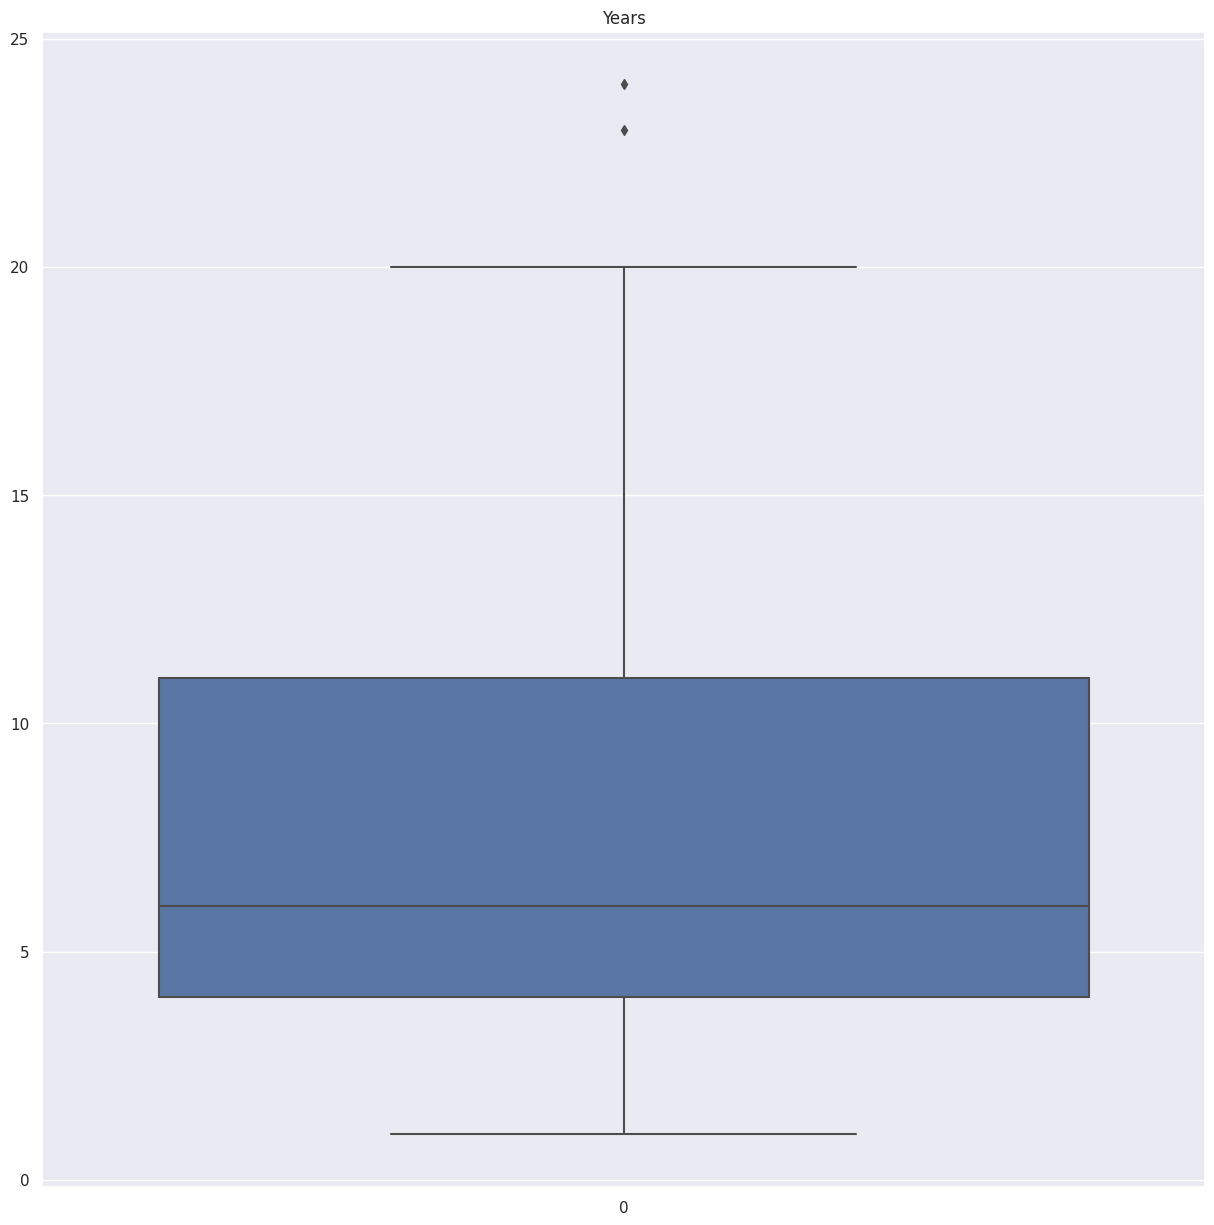

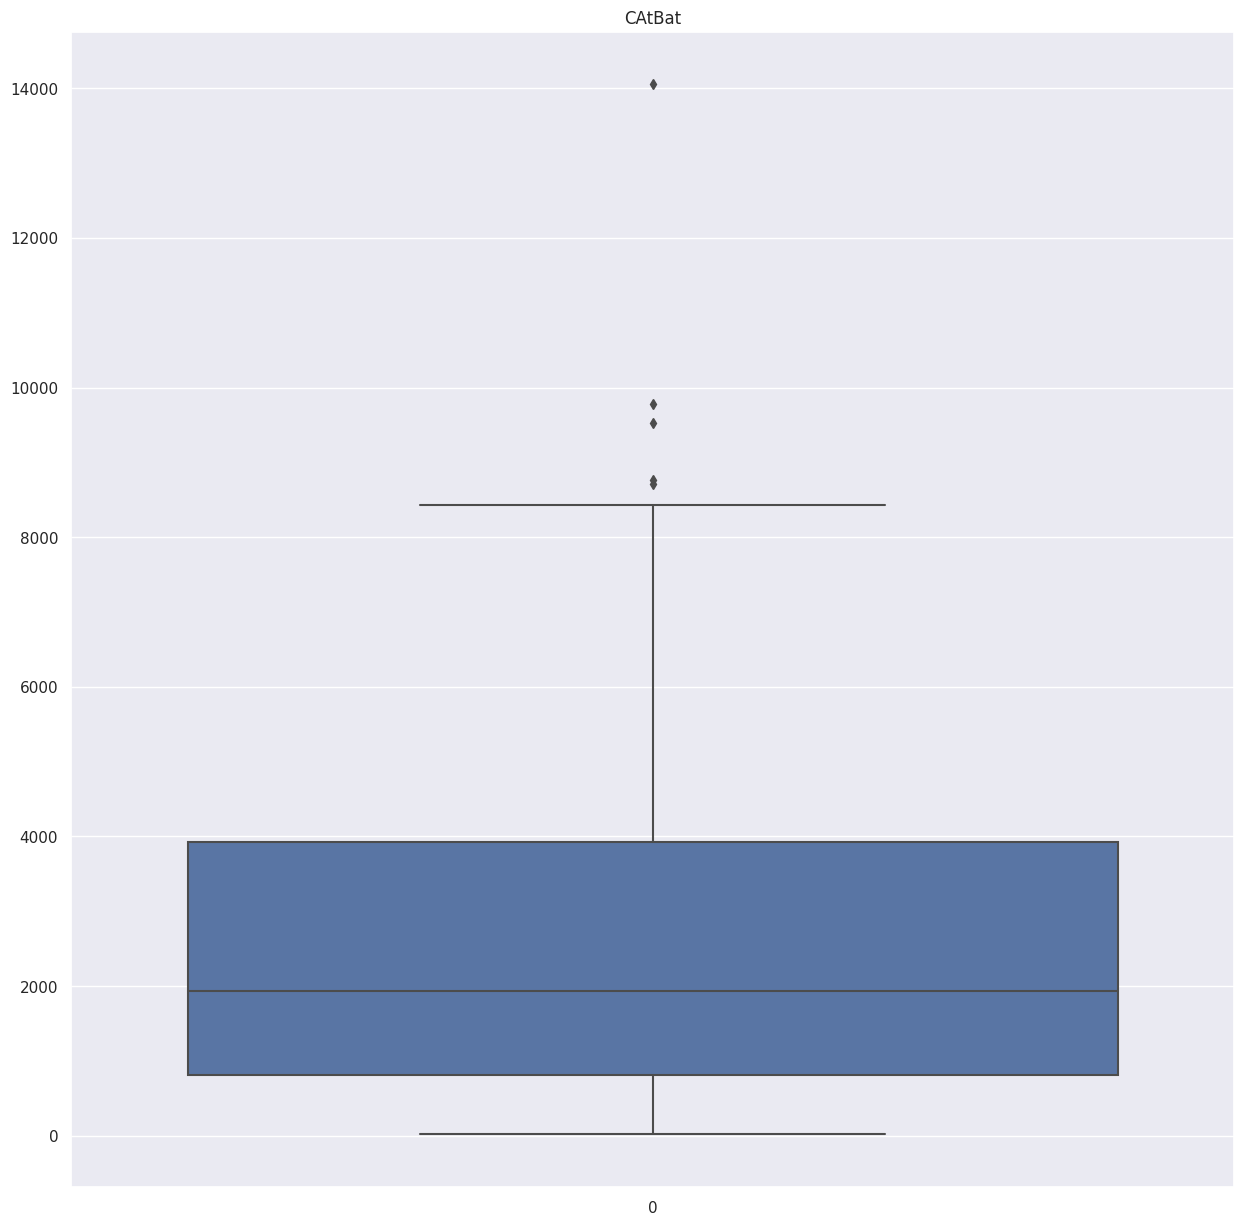

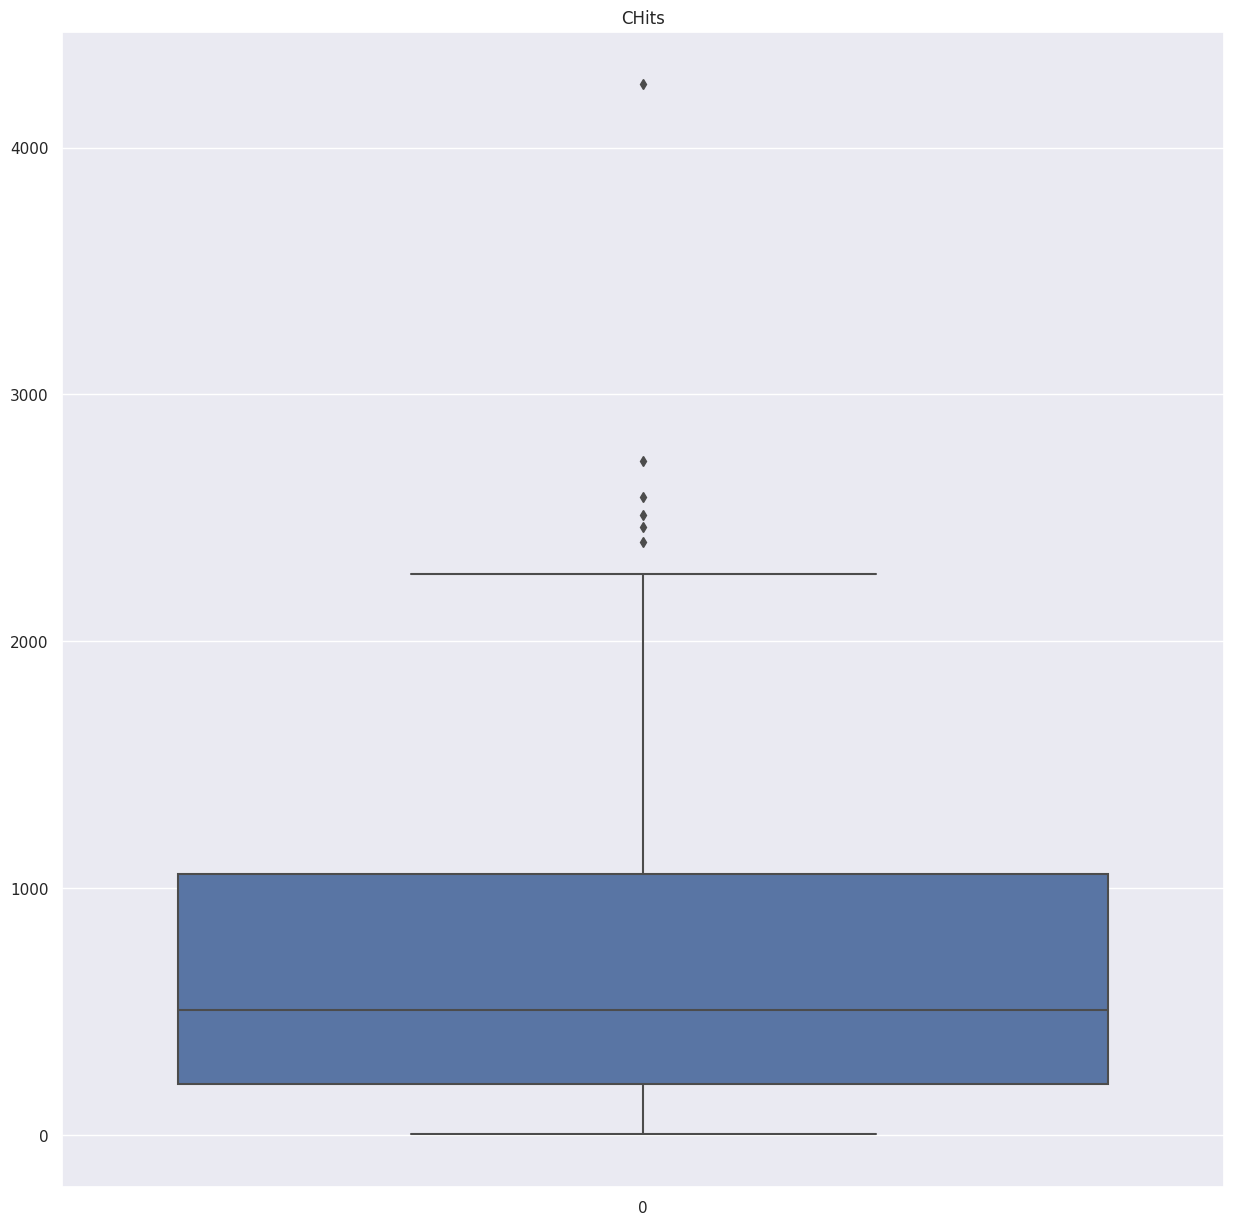

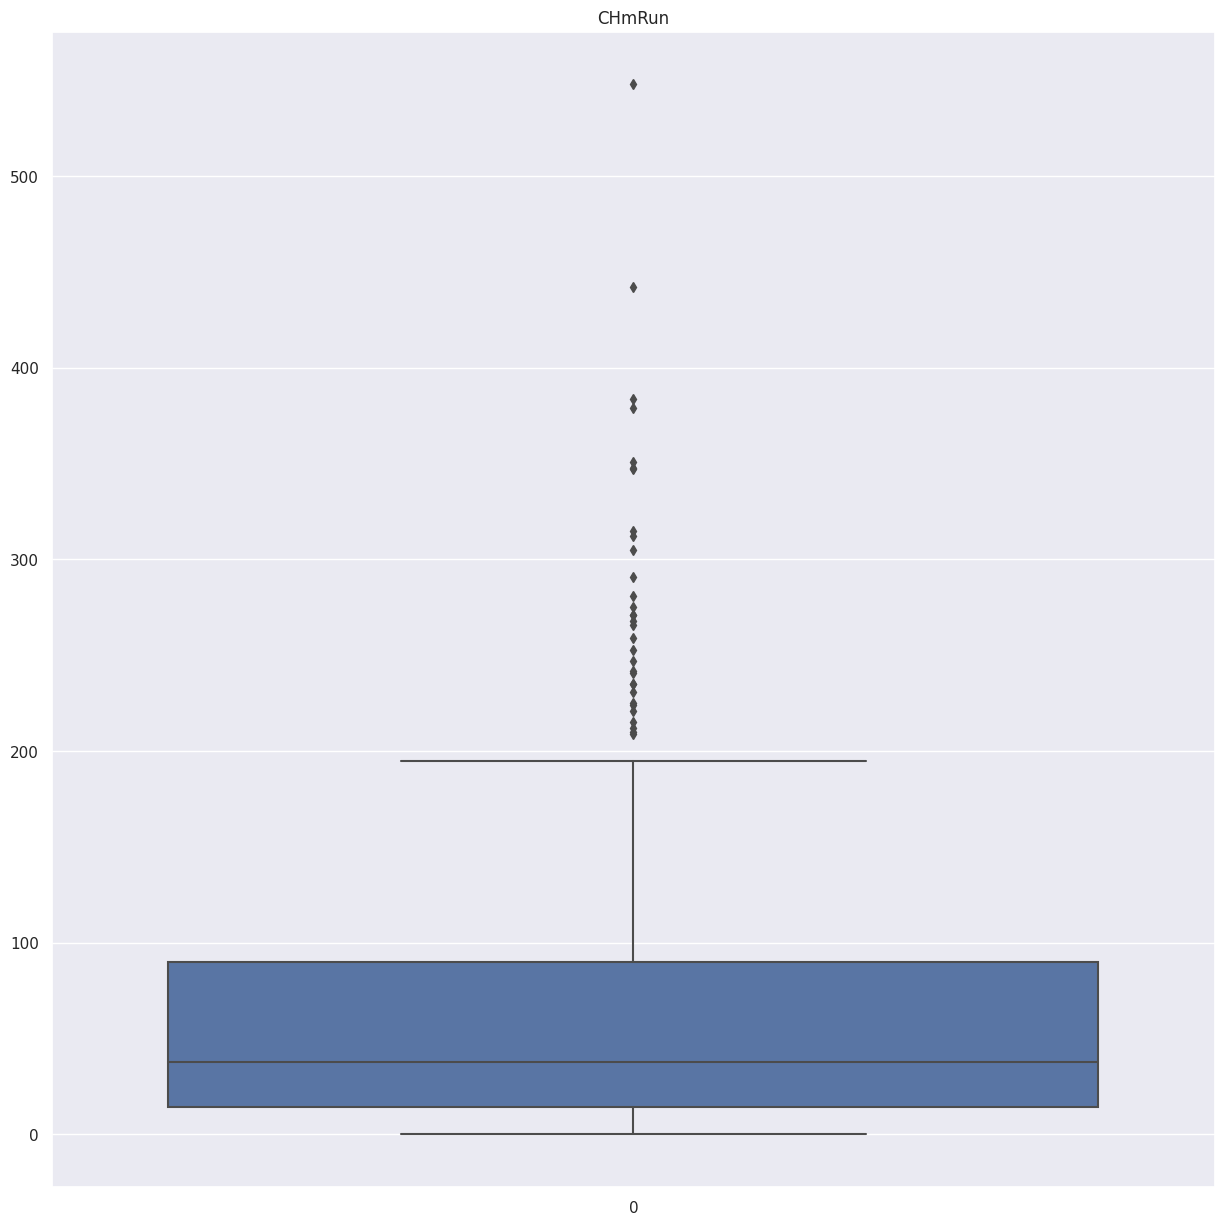

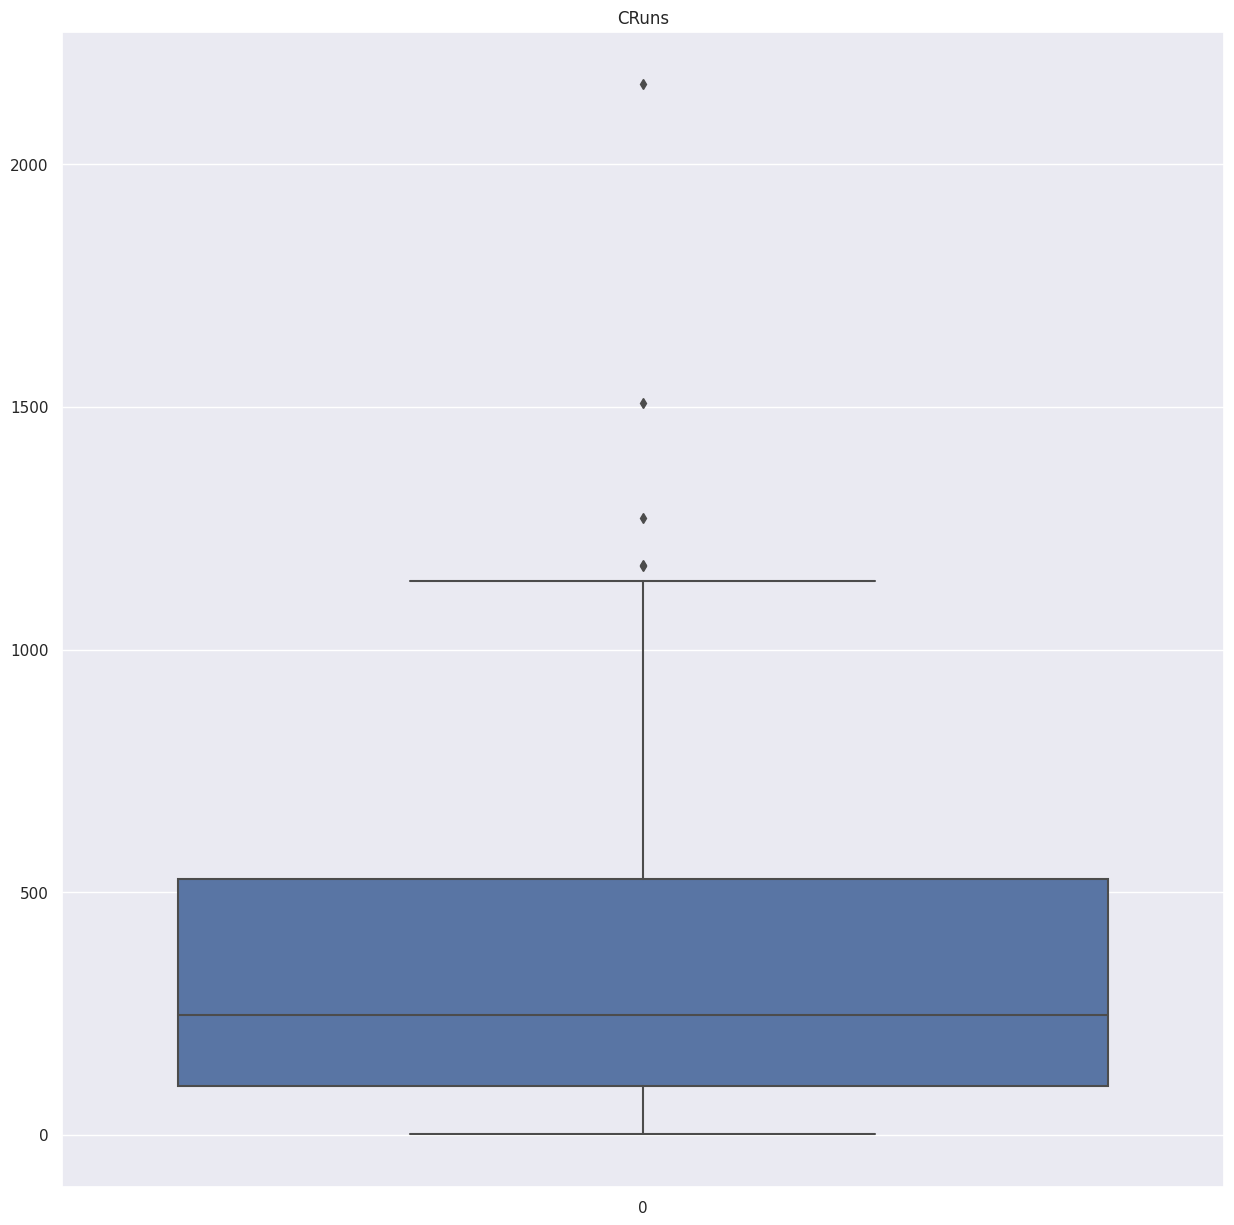

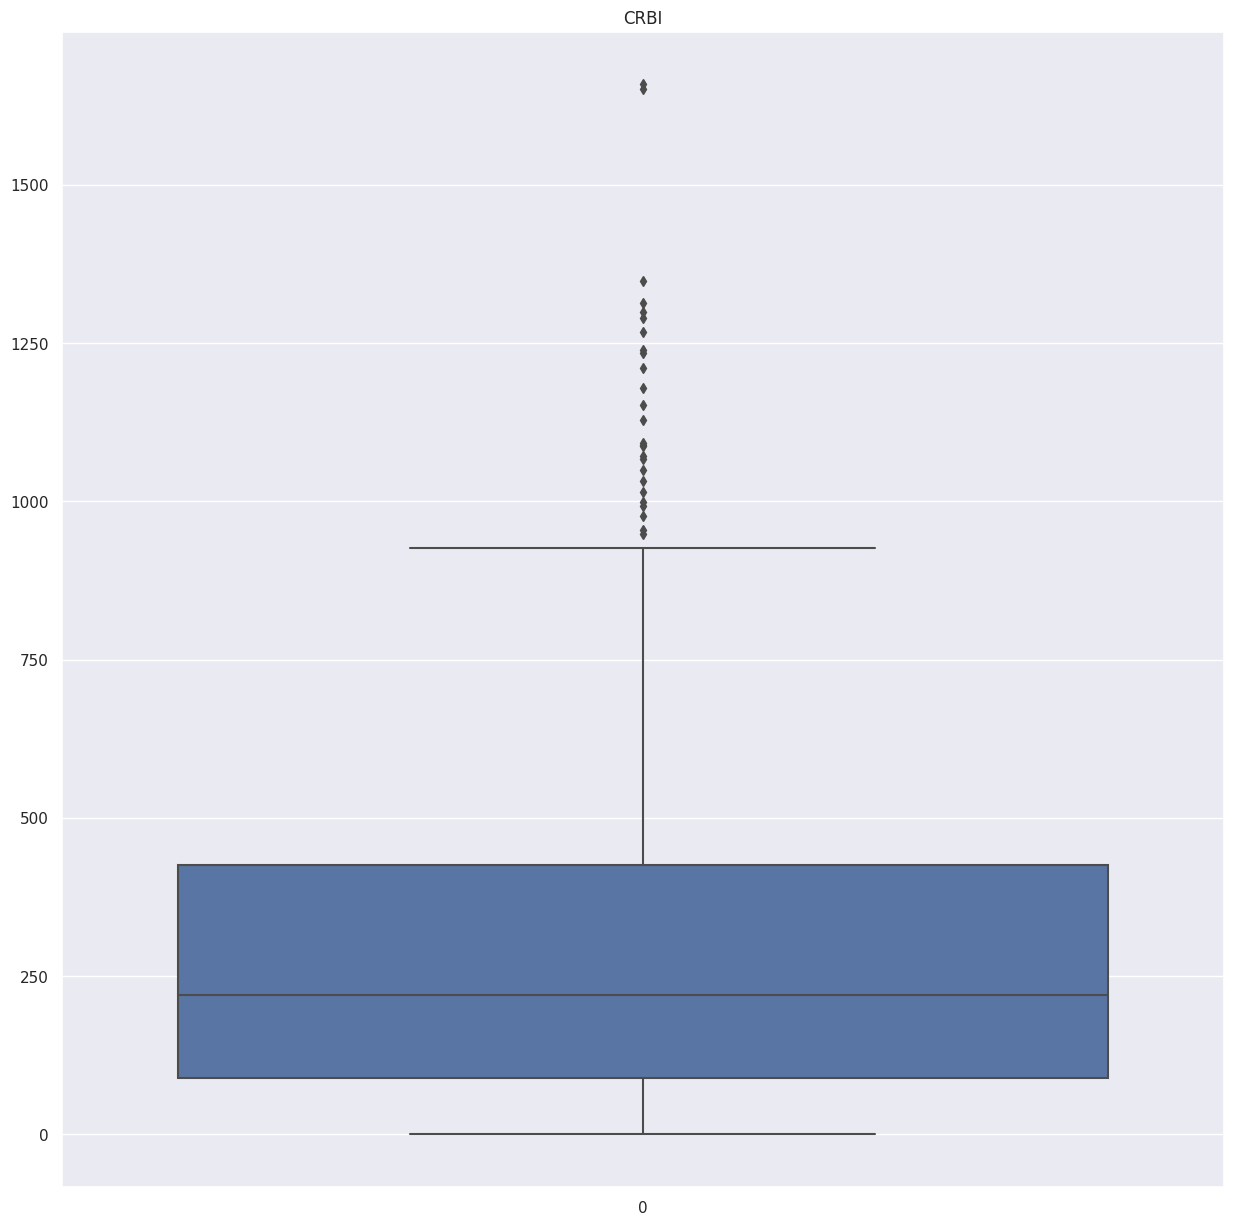

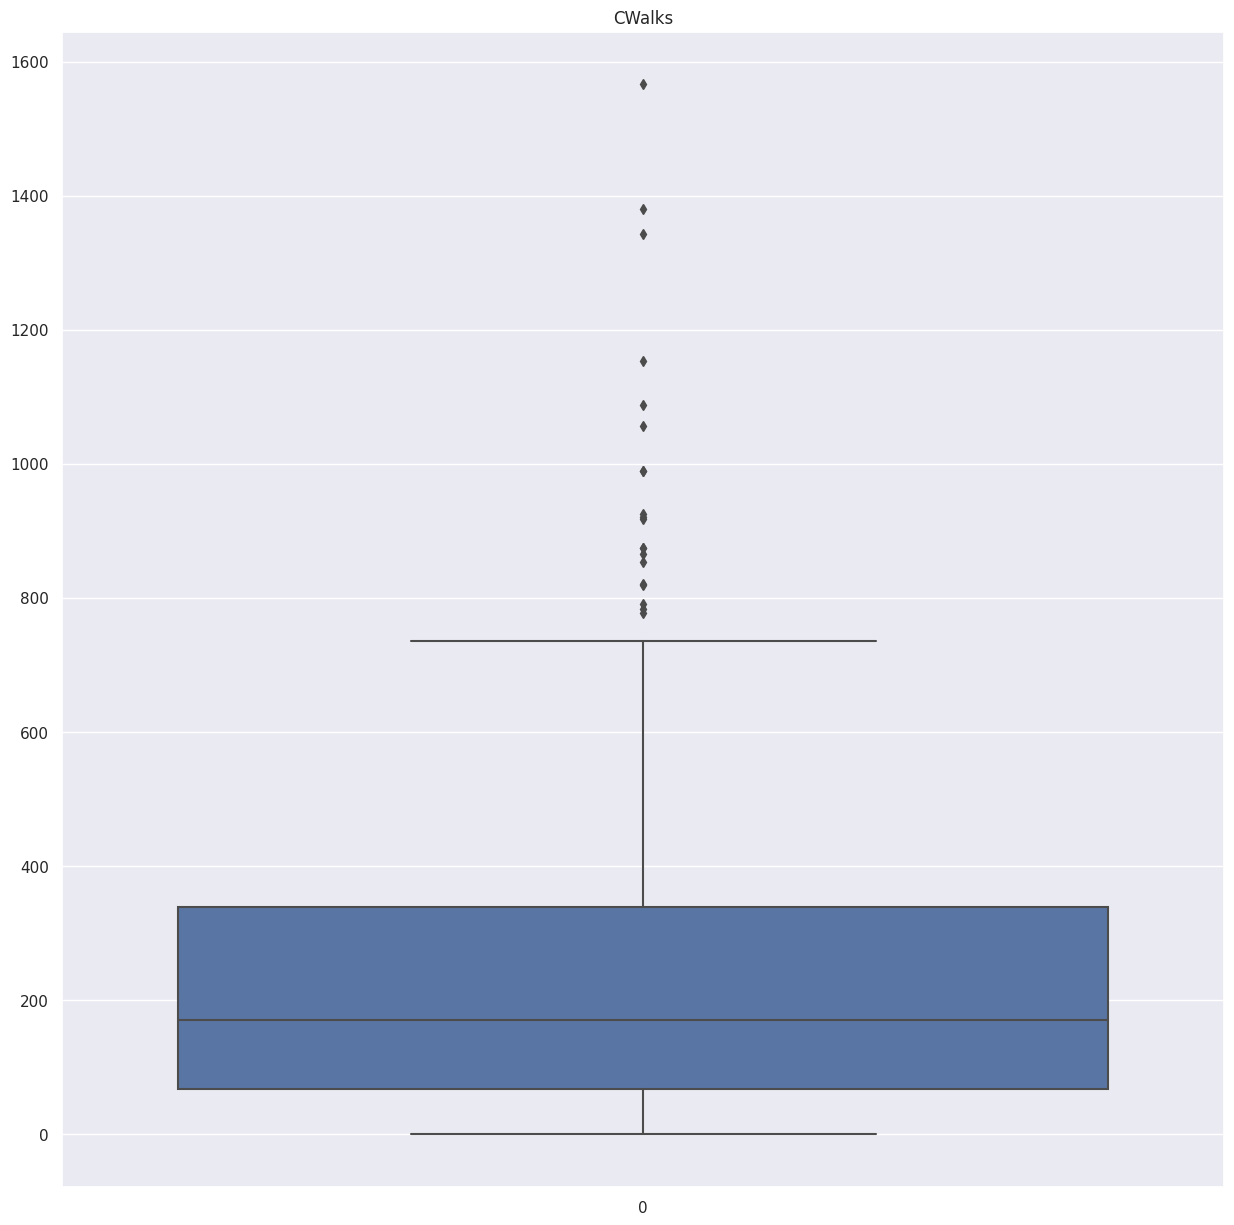

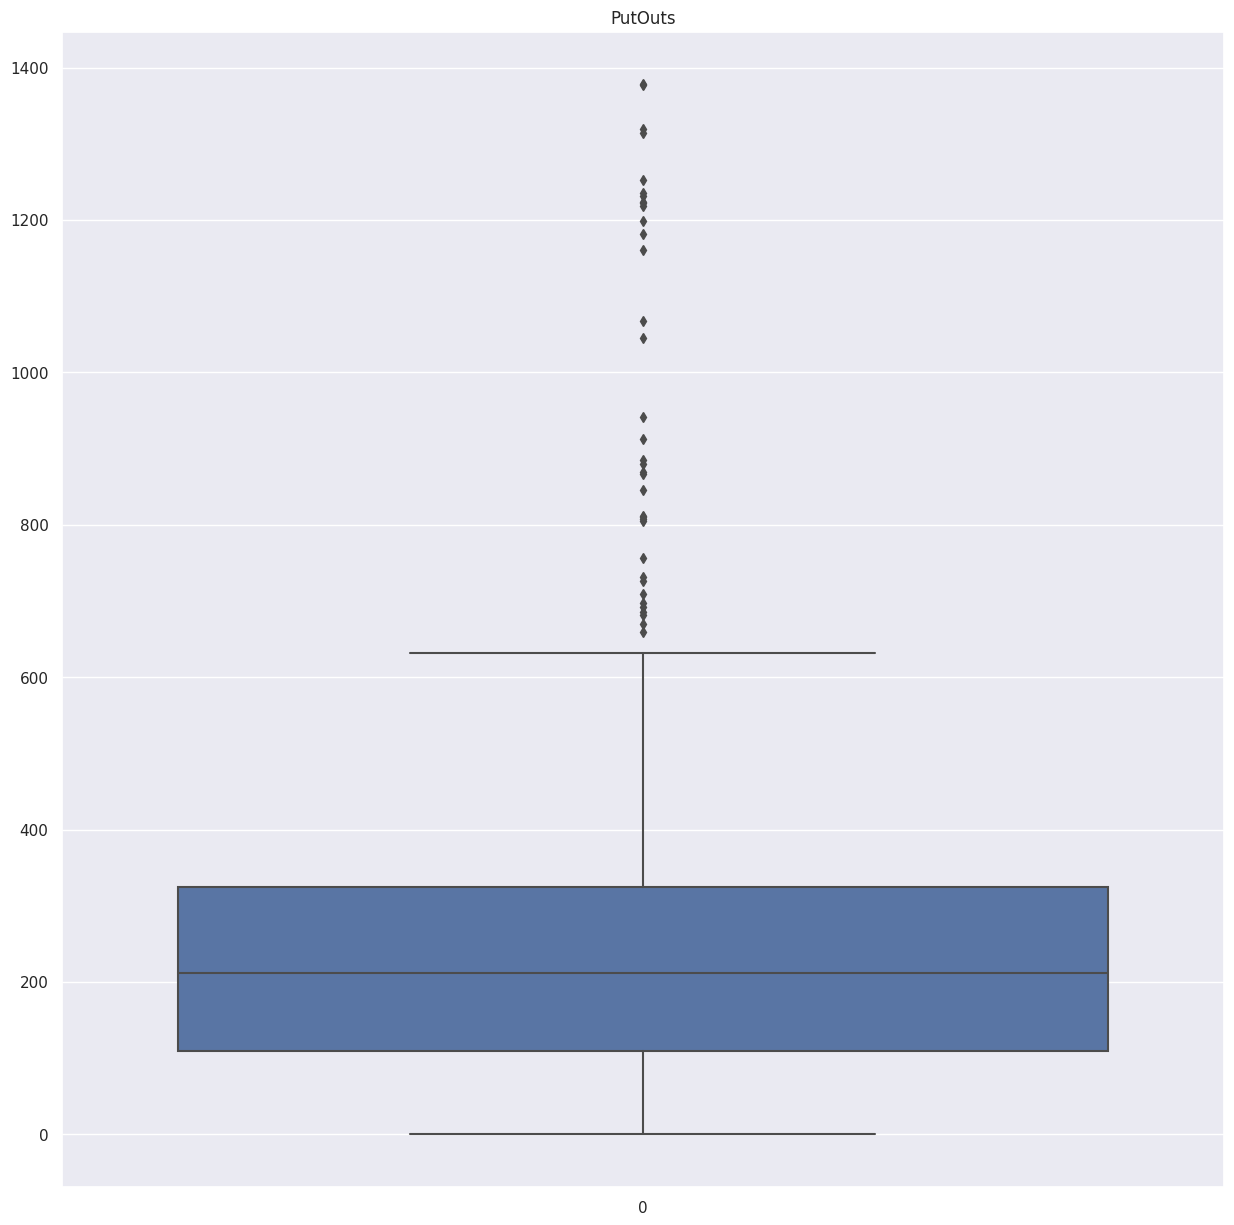

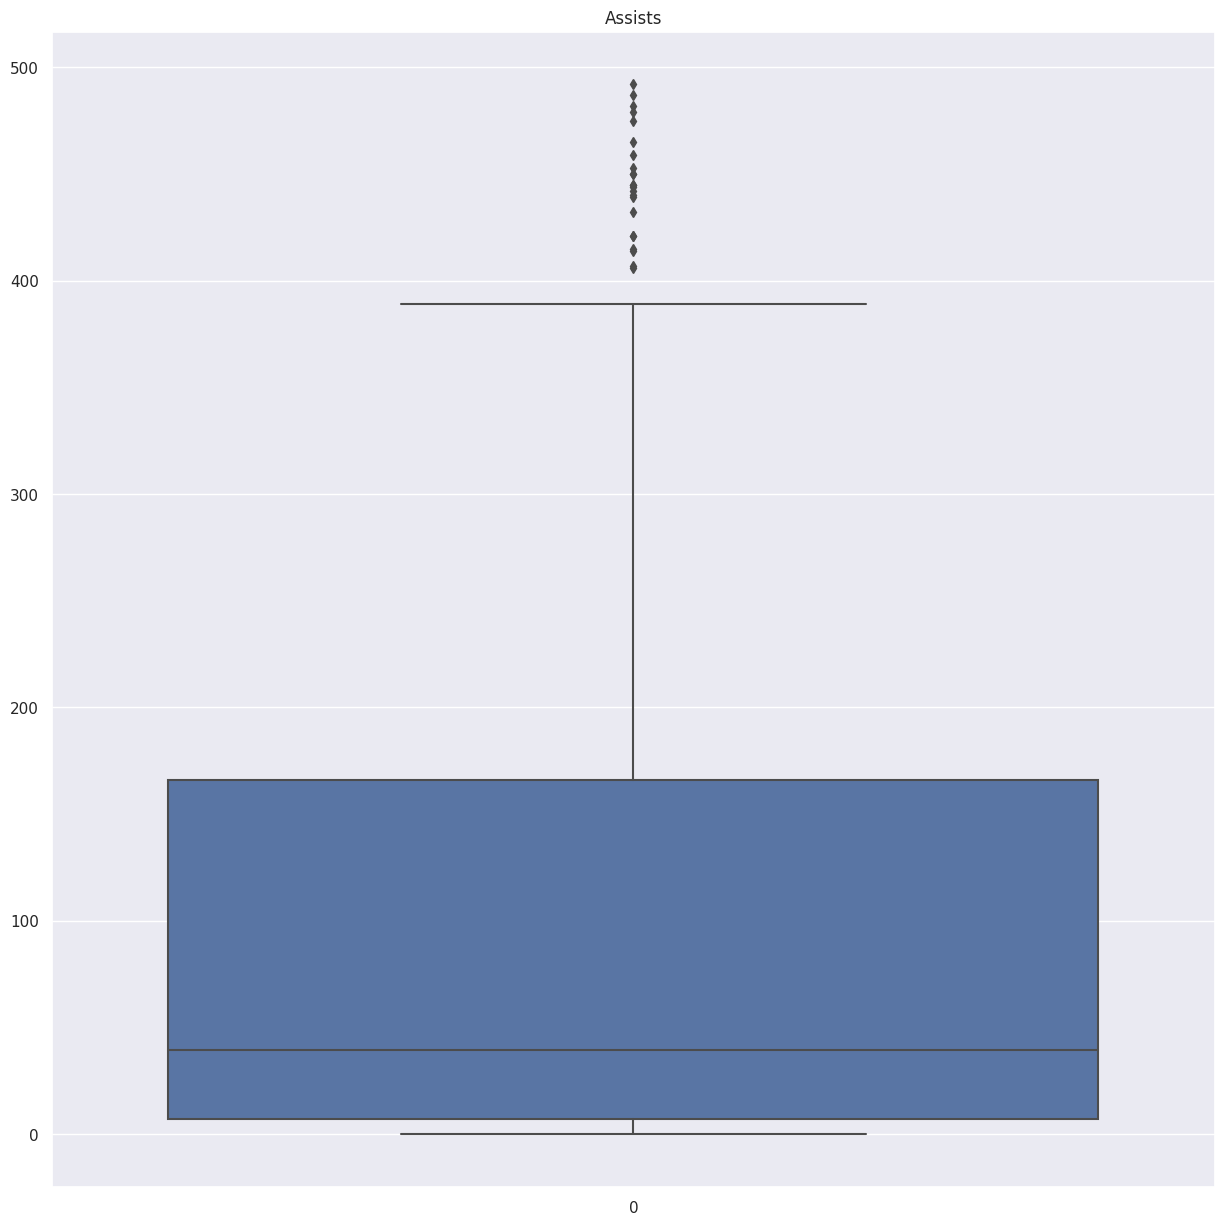

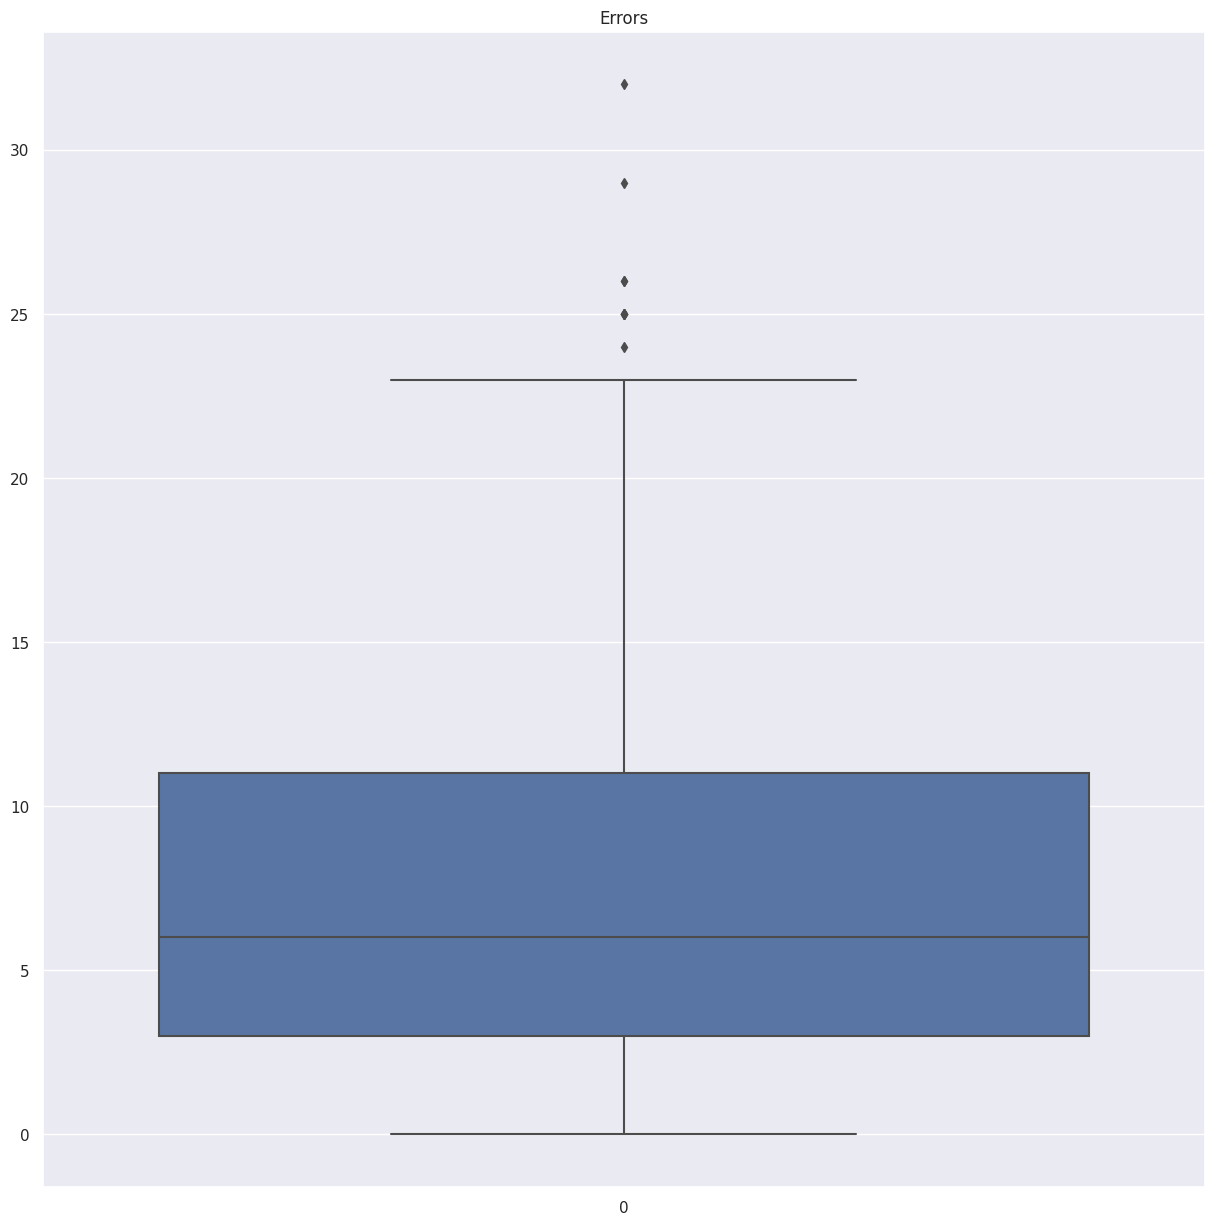

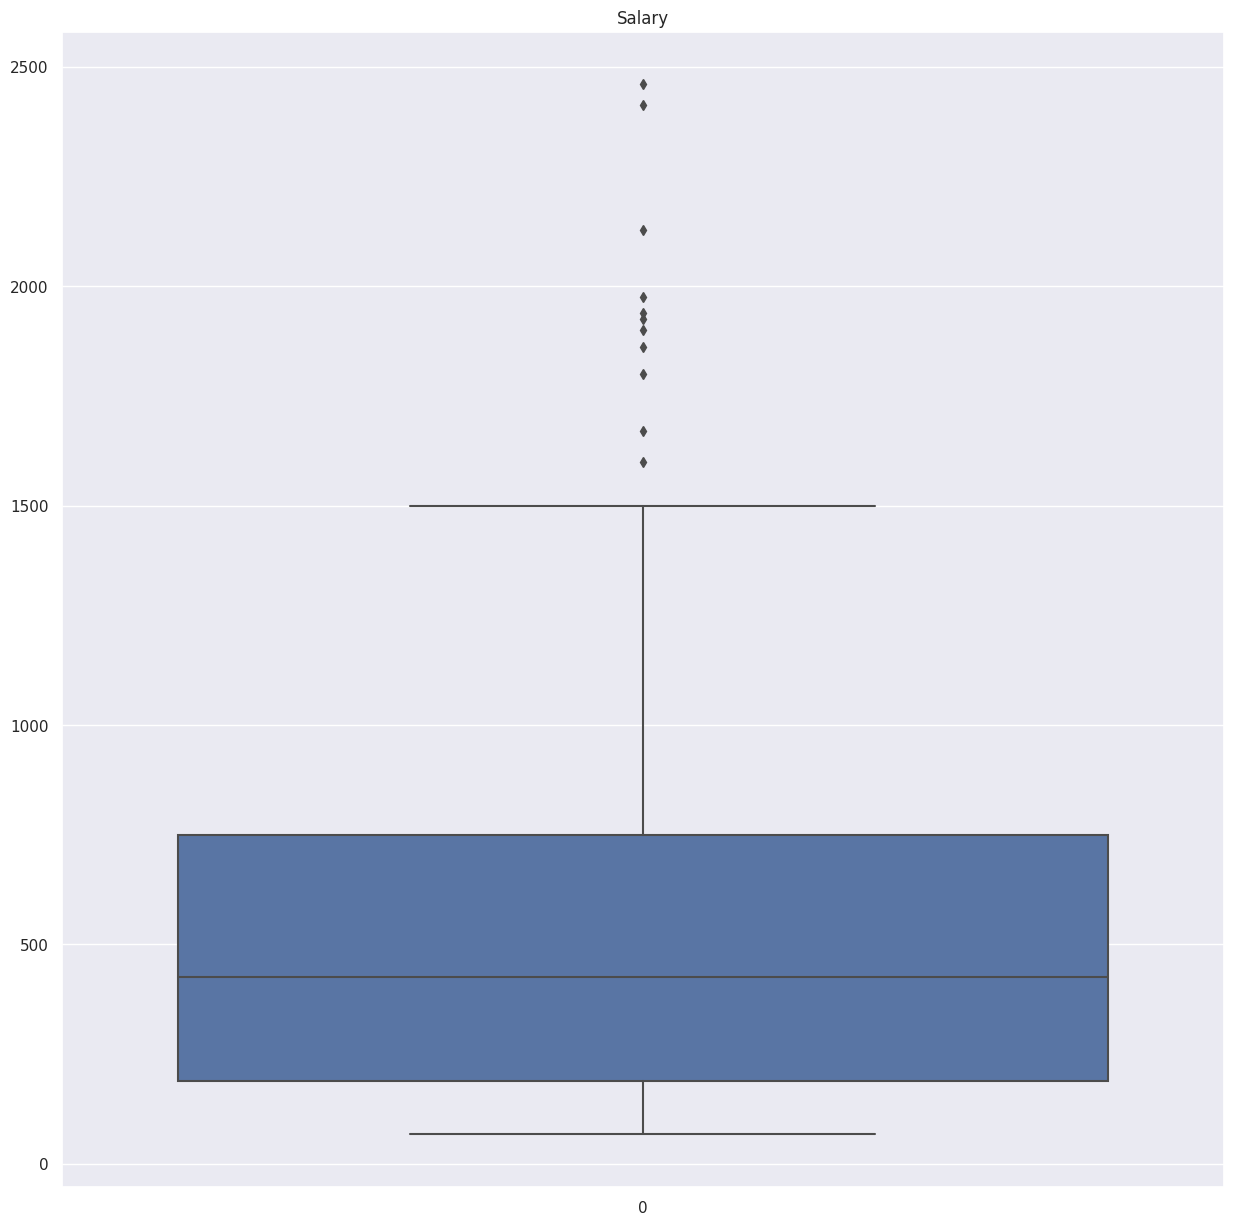

In [ ]:
for col in num_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show(block=True)

In [ ]:
# Eğer veriyi çok tanımıyorsak ucundan tıraşlamak için q1=0.1 ve q3=0.9 yapabiliriz.
for col in num_cols:
    print(col, check_outlier(df, col, q1=0.1, q3=0.9))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits True
CHmRun True
CRuns False
CRBI False
CWalks True
PutOuts False
Assists False
Errors False
Salary False


In [ ]:
for col in num_cols:
    if check_outlier(df, col, q1=0.1, q3=0.9):
        replace_with_thresholds(df, col, q1=0.1, q3=0.9)

   League  Ratio
A     175  54.35
N     147  45.65
##########################################


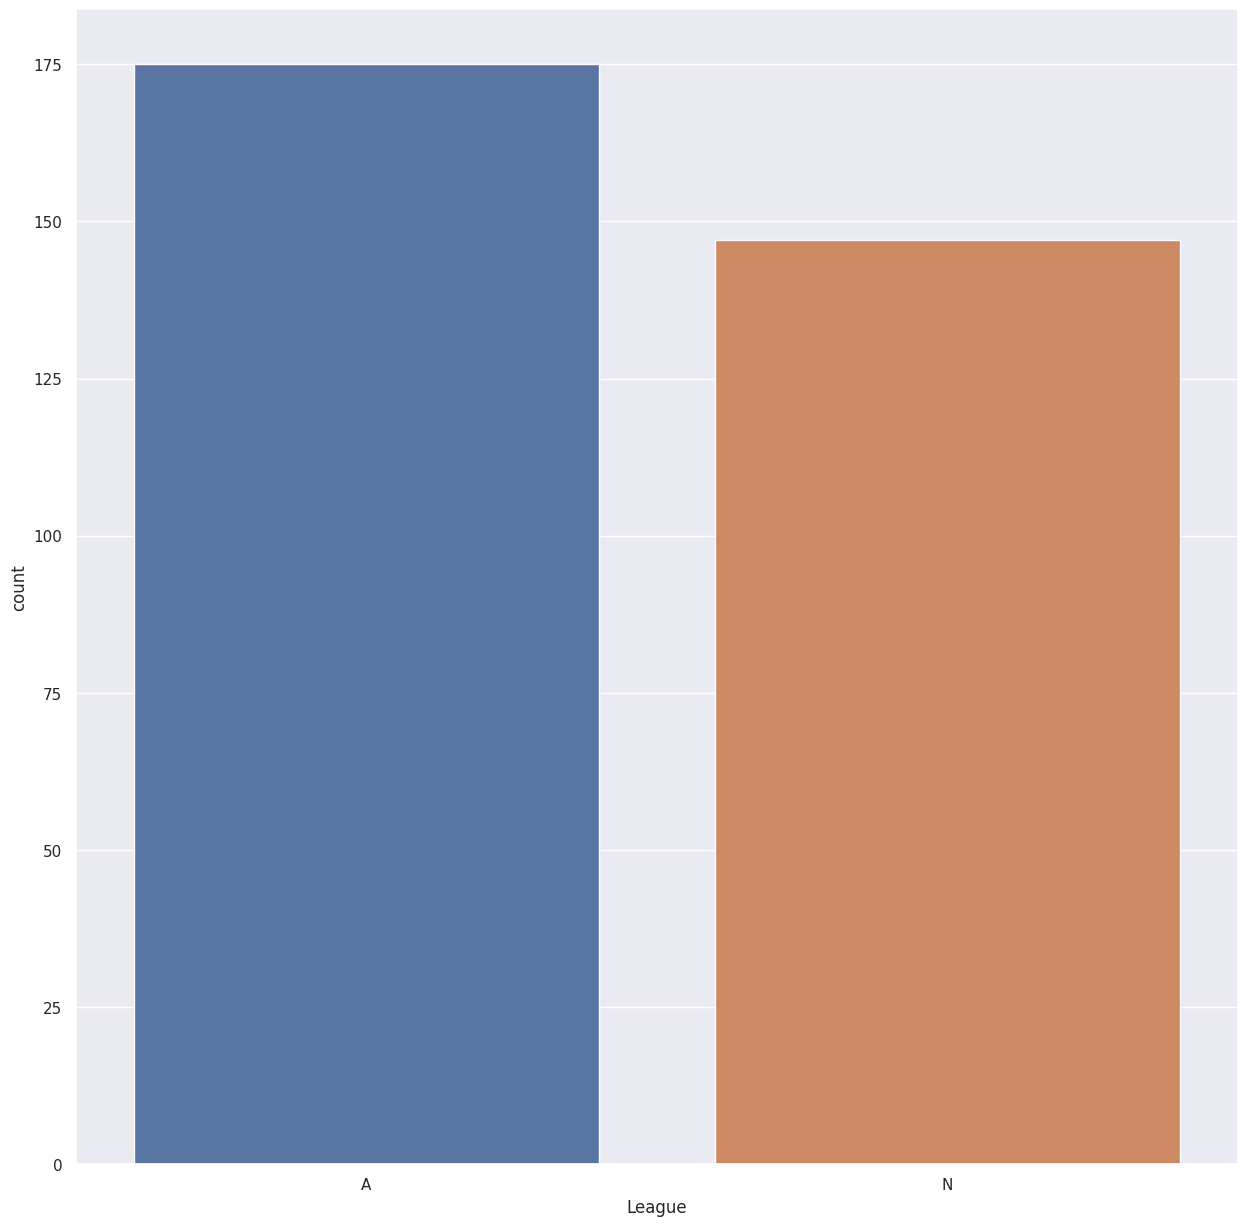

   Division  Ratio
W       165  51.24
E       157  48.76
##########################################


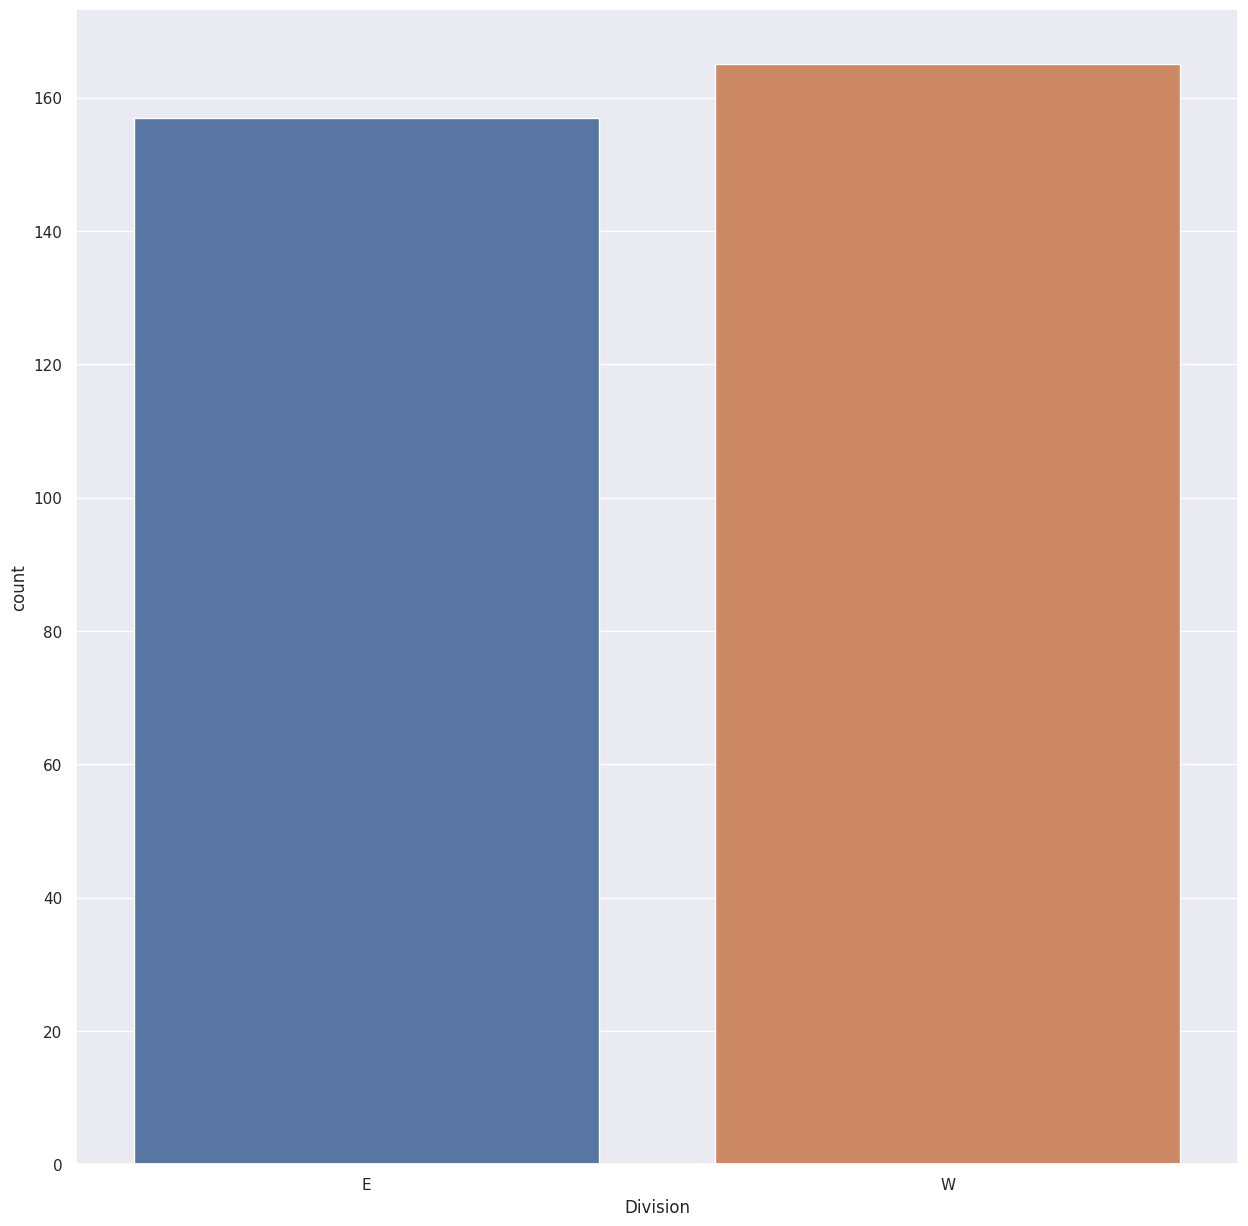

   NewLeague  Ratio
A        176  54.66
N        146  45.34
##########################################


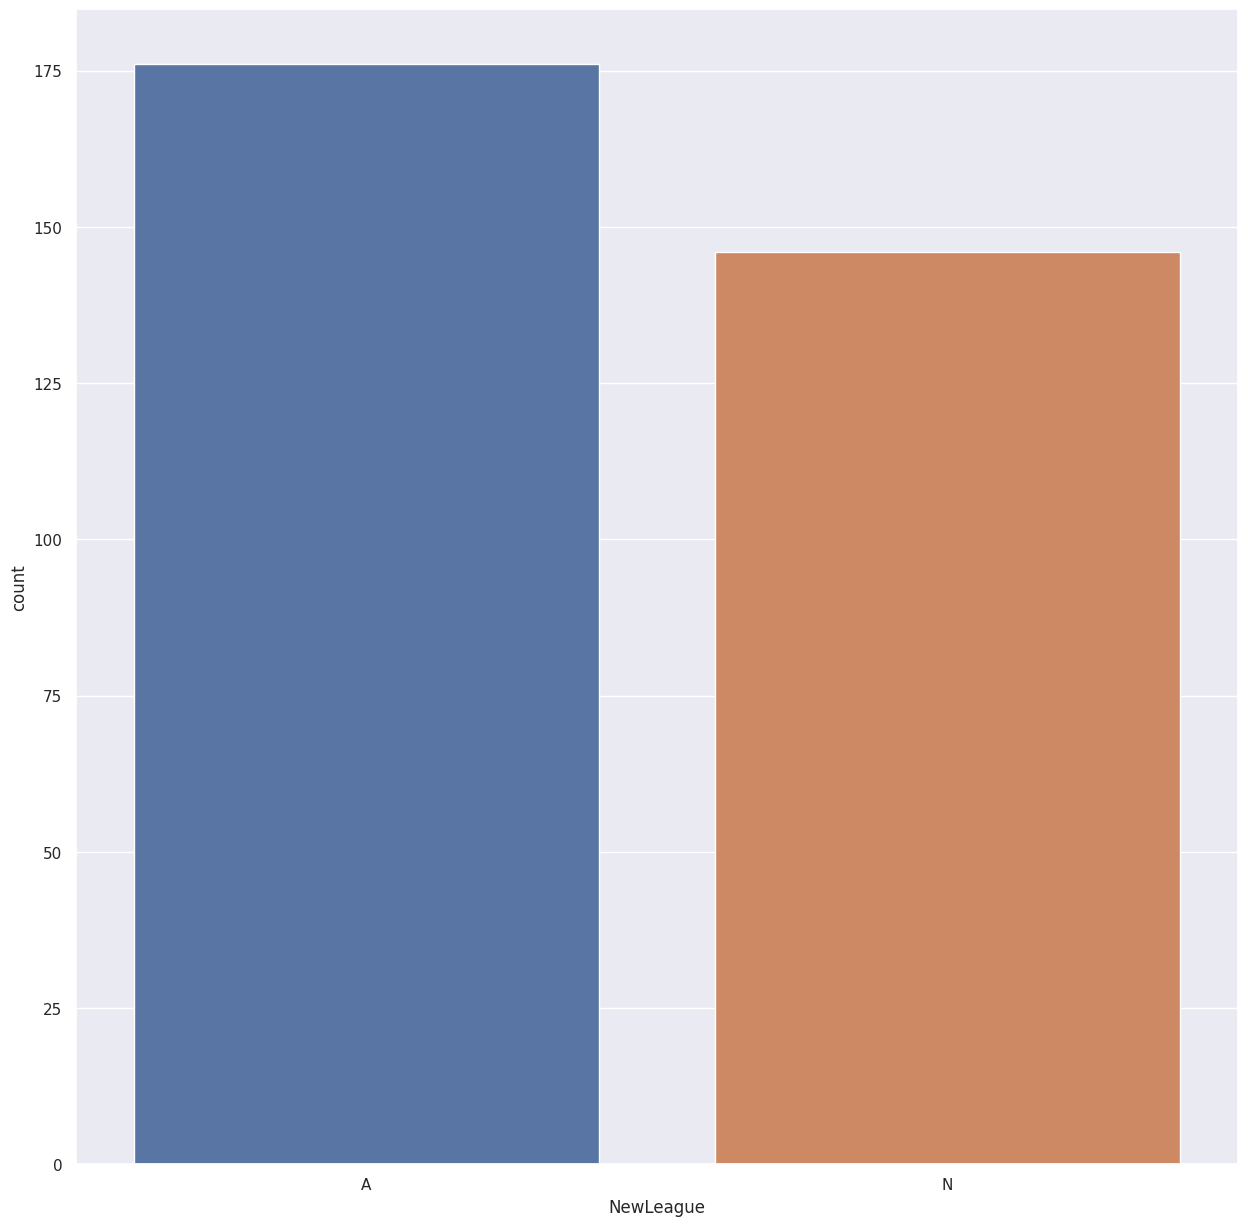

In [ ]:
# Analysis of Categorical Variables (Kategorik Değişken Analizi )

for col in cat_cols:
    cat_summary(df, col, plot=True)

count   322.00
mean    380.93
std     153.40
min      16.00
5%      161.00
10%     194.10
20%     221.80
30%     281.30
40%     321.80
50%     379.50
60%     430.20
70%     490.00
80%     535.60
90%     584.90
95%     609.90
99%     658.59
max     687.00
Name: AtBat, dtype: float64


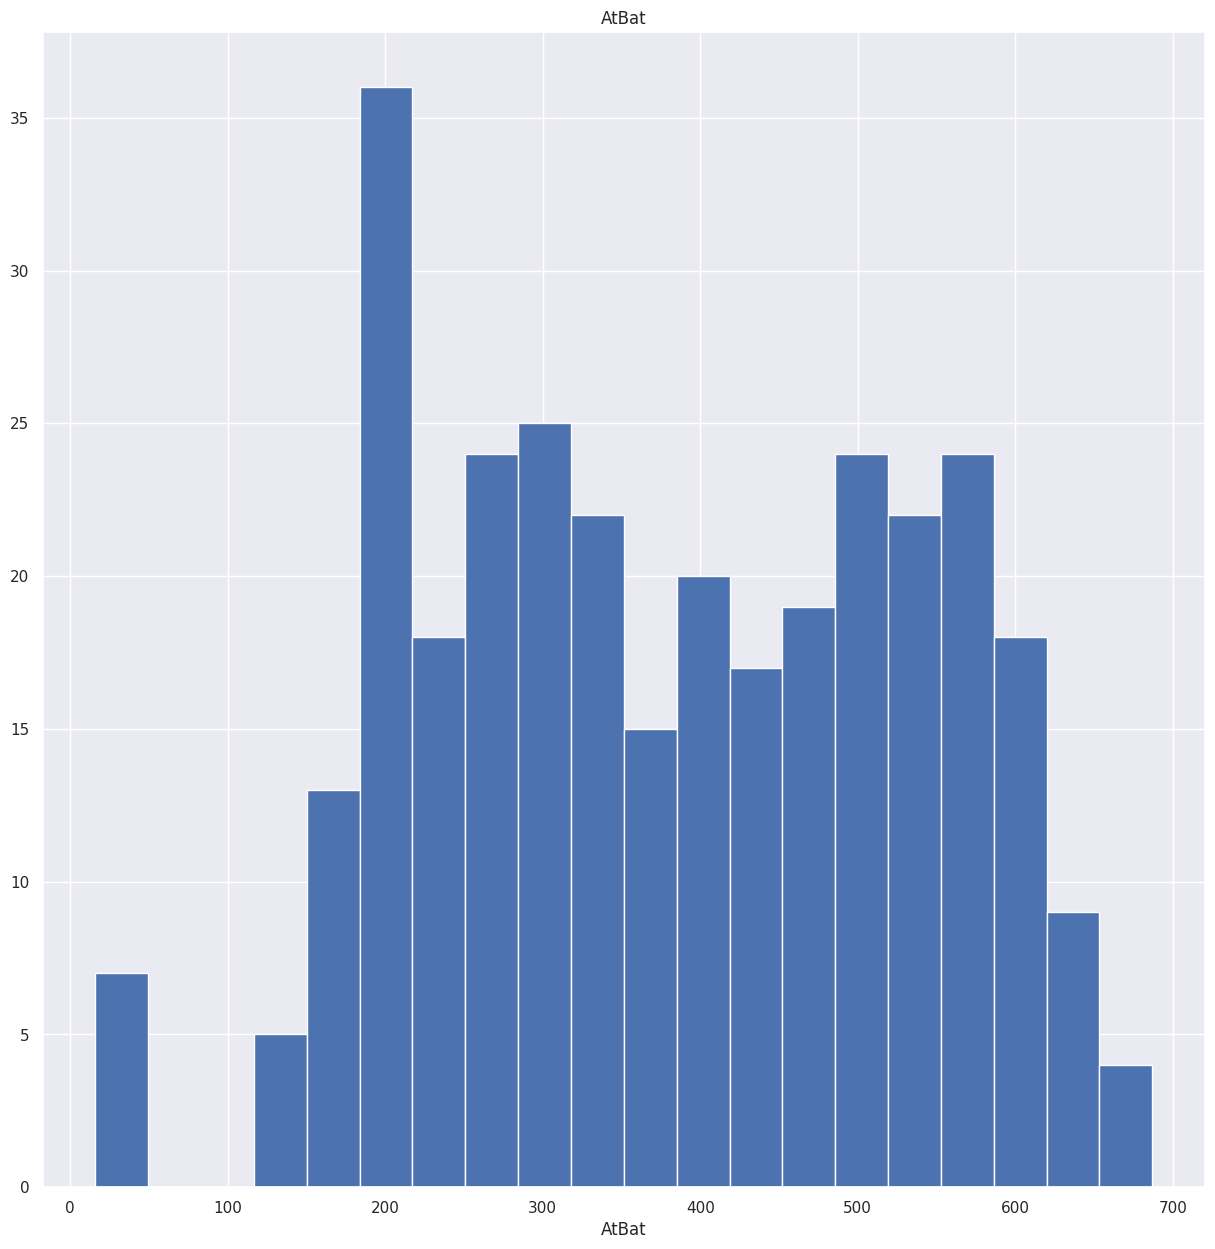

count   322.00
mean    101.02
std      46.45
min       1.00
5%       39.00
10%      45.10
20%      57.00
30%      70.00
40%      82.00
50%      96.00
60%     113.00
70%     128.70
80%     144.00
90%     163.00
95%     174.00
99%     210.79
max     238.00
Name: Hits, dtype: float64


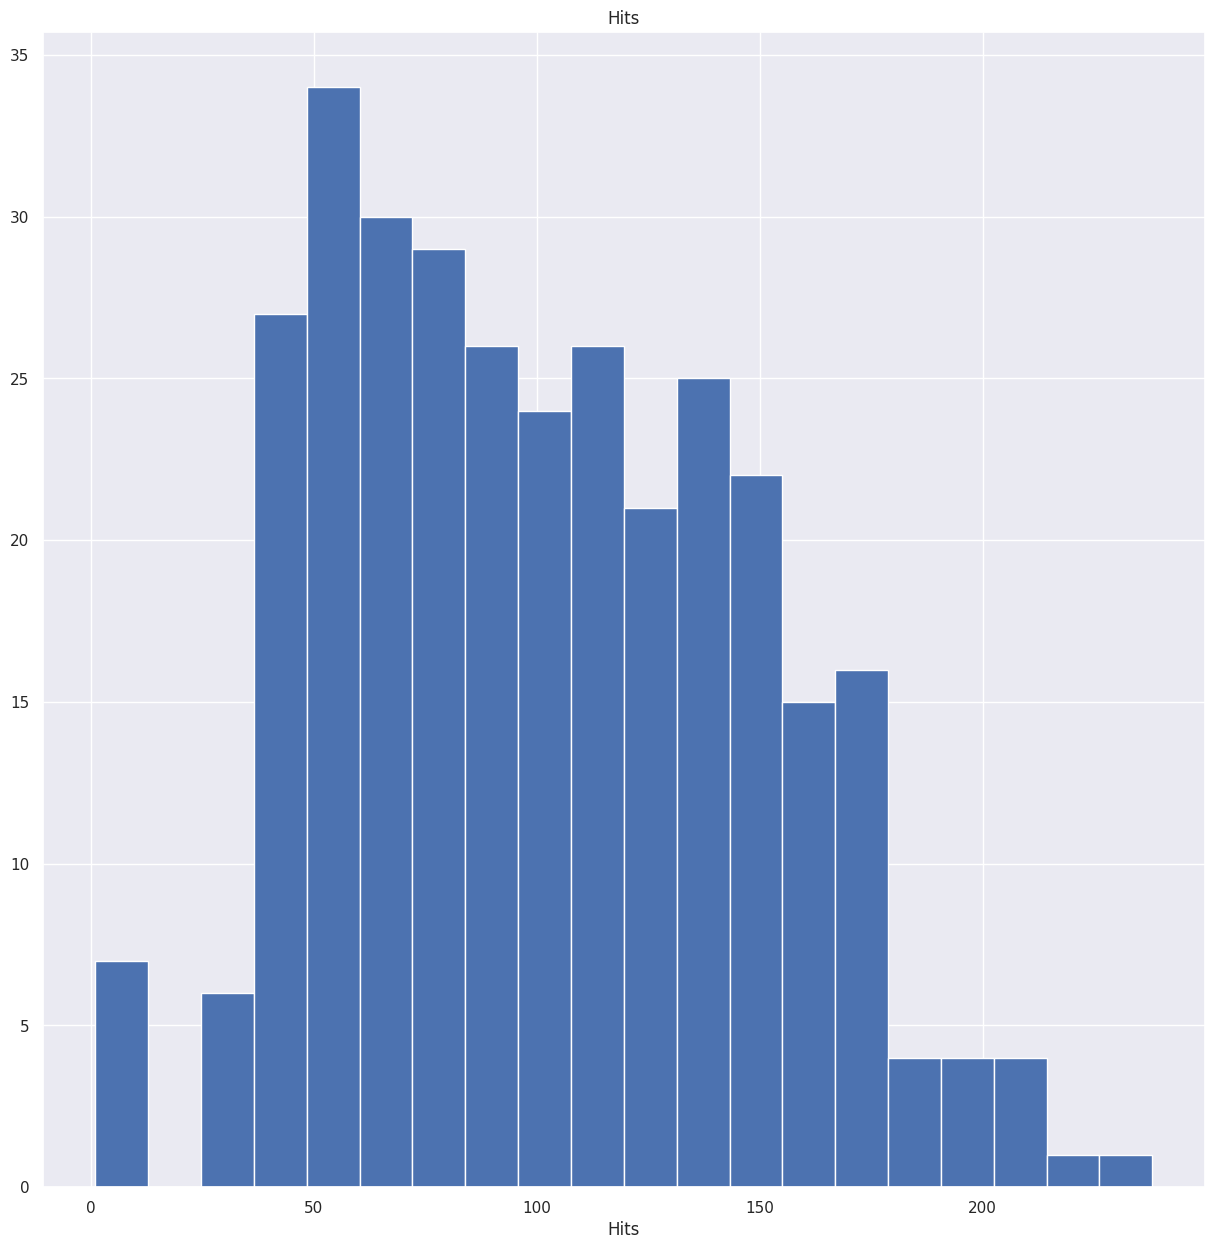

count   322.00
mean     10.77
std       8.71
min       0.00
5%        0.00
10%       1.00
20%       3.00
30%       5.00
40%       6.00
50%       8.00
60%      10.60
70%      14.00
80%      18.00
90%      24.00
95%      28.95
99%      33.00
max      40.00
Name: HmRun, dtype: float64


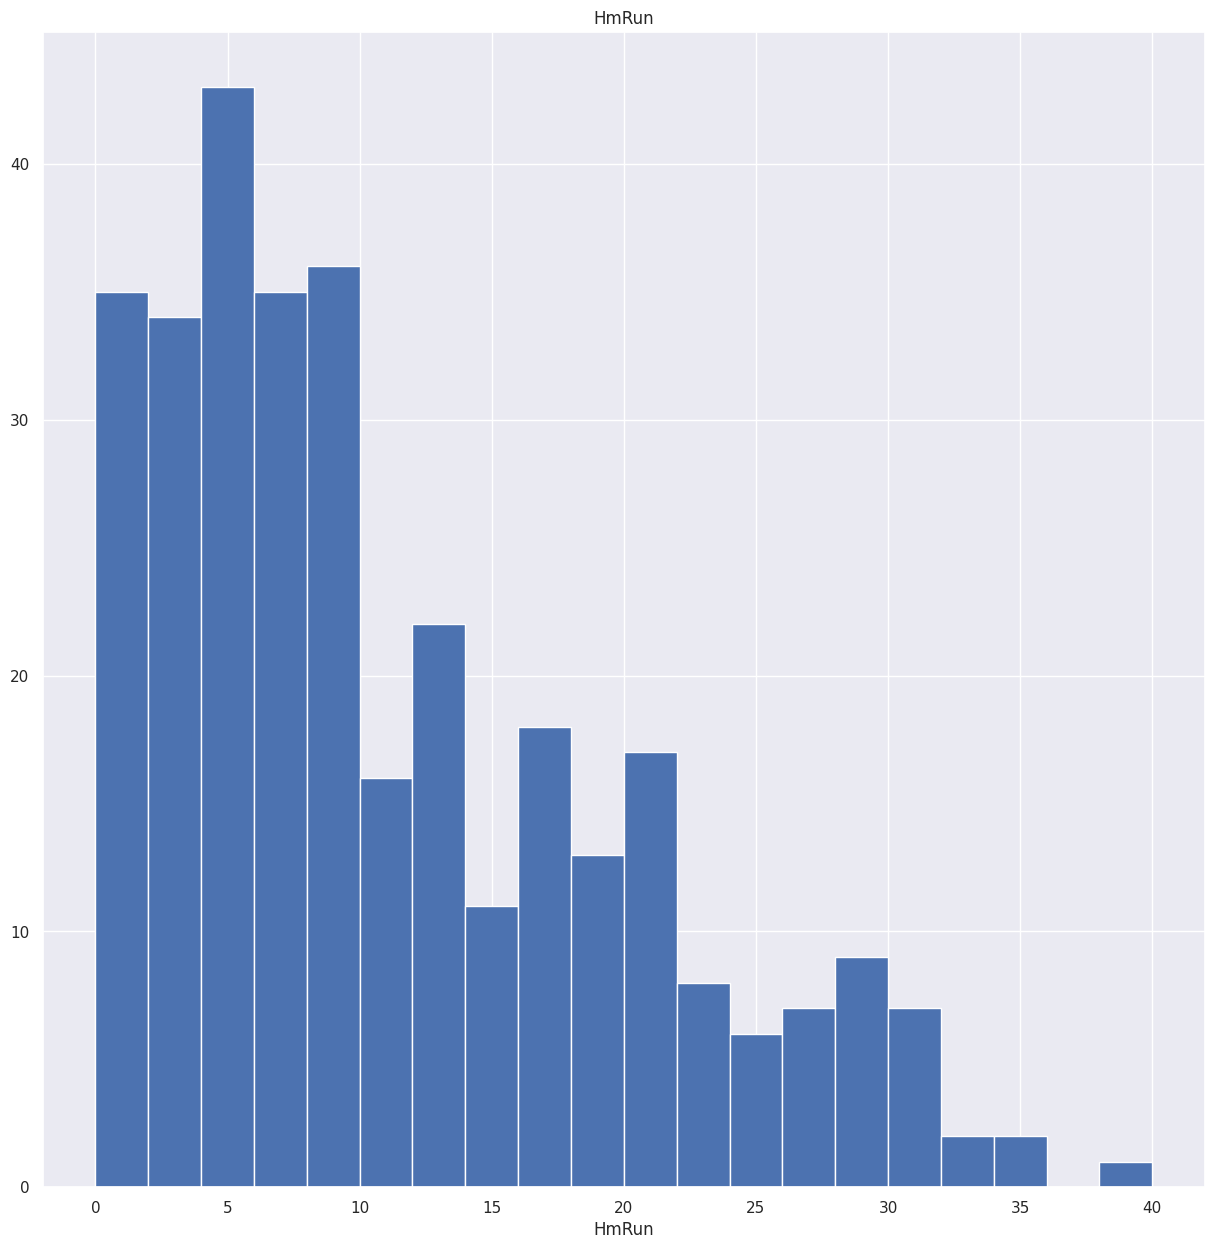

count   322.00
mean     50.91
std      26.02
min       0.00
5%       17.00
10%      20.10
20%      27.00
30%      33.00
40%      41.00
50%      48.00
60%      55.60
70%      66.00
80%      75.80
90%      89.00
95%      94.00
99%     107.79
max     130.00
Name: Runs, dtype: float64


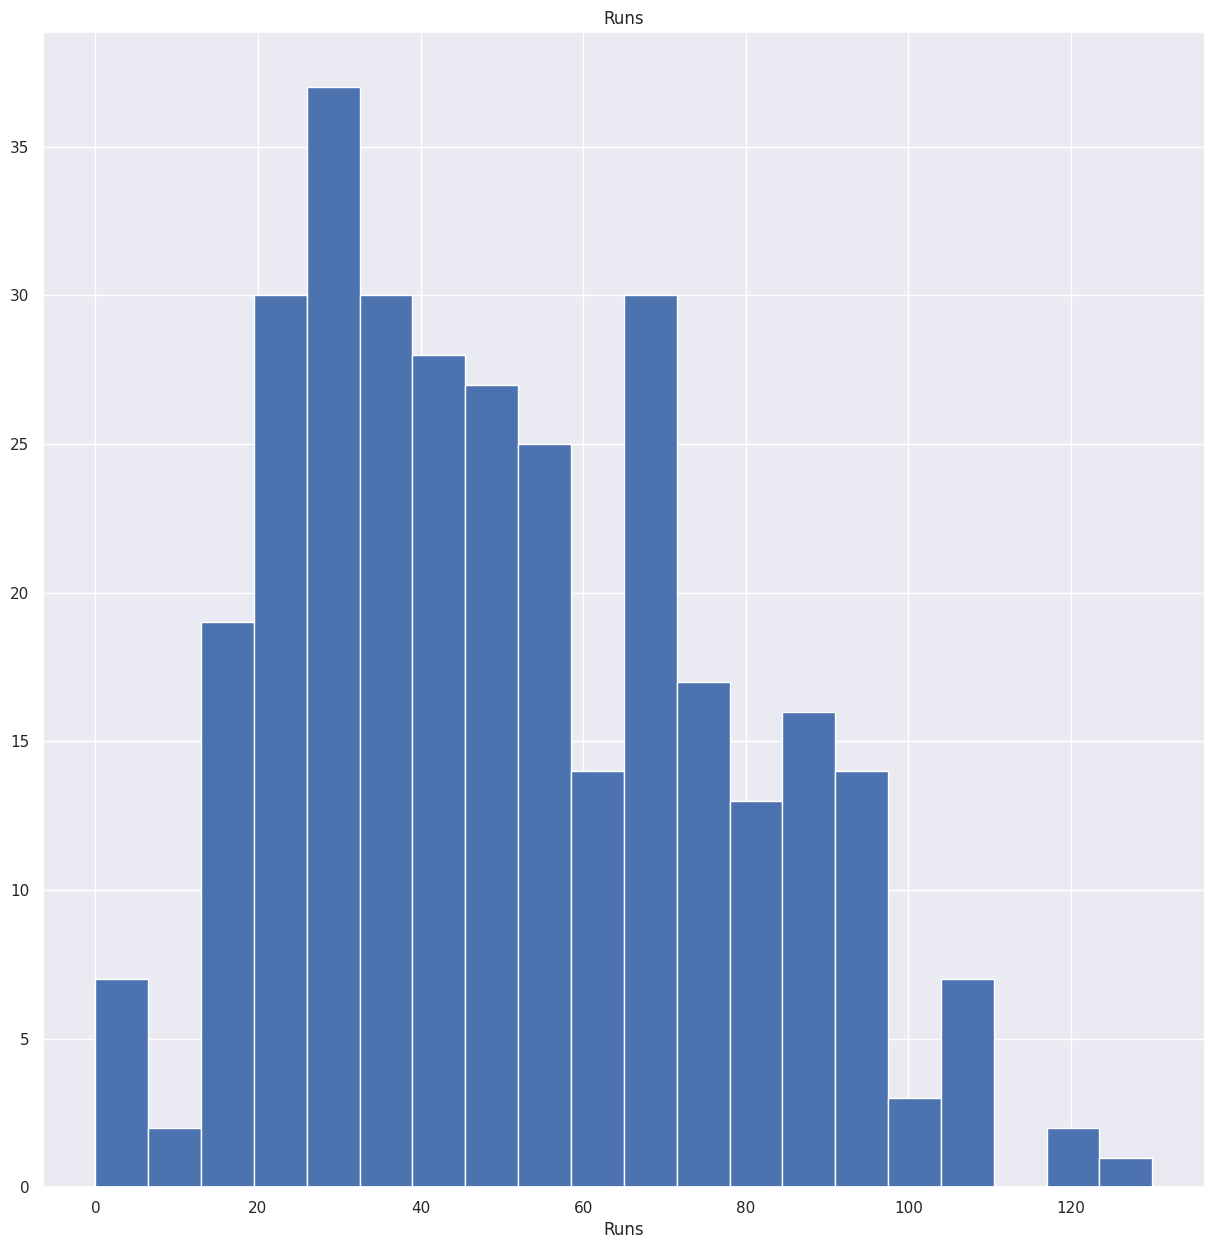

count   322.00
mean     48.03
std      26.17
min       0.00
5%       14.00
10%      19.00
20%      26.00
30%      30.00
40%      36.40
50%      44.00
60%      49.00
70%      58.00
80%      73.00
90%      86.00
95%      96.00
99%     112.37
max     121.00
Name: RBI, dtype: float64


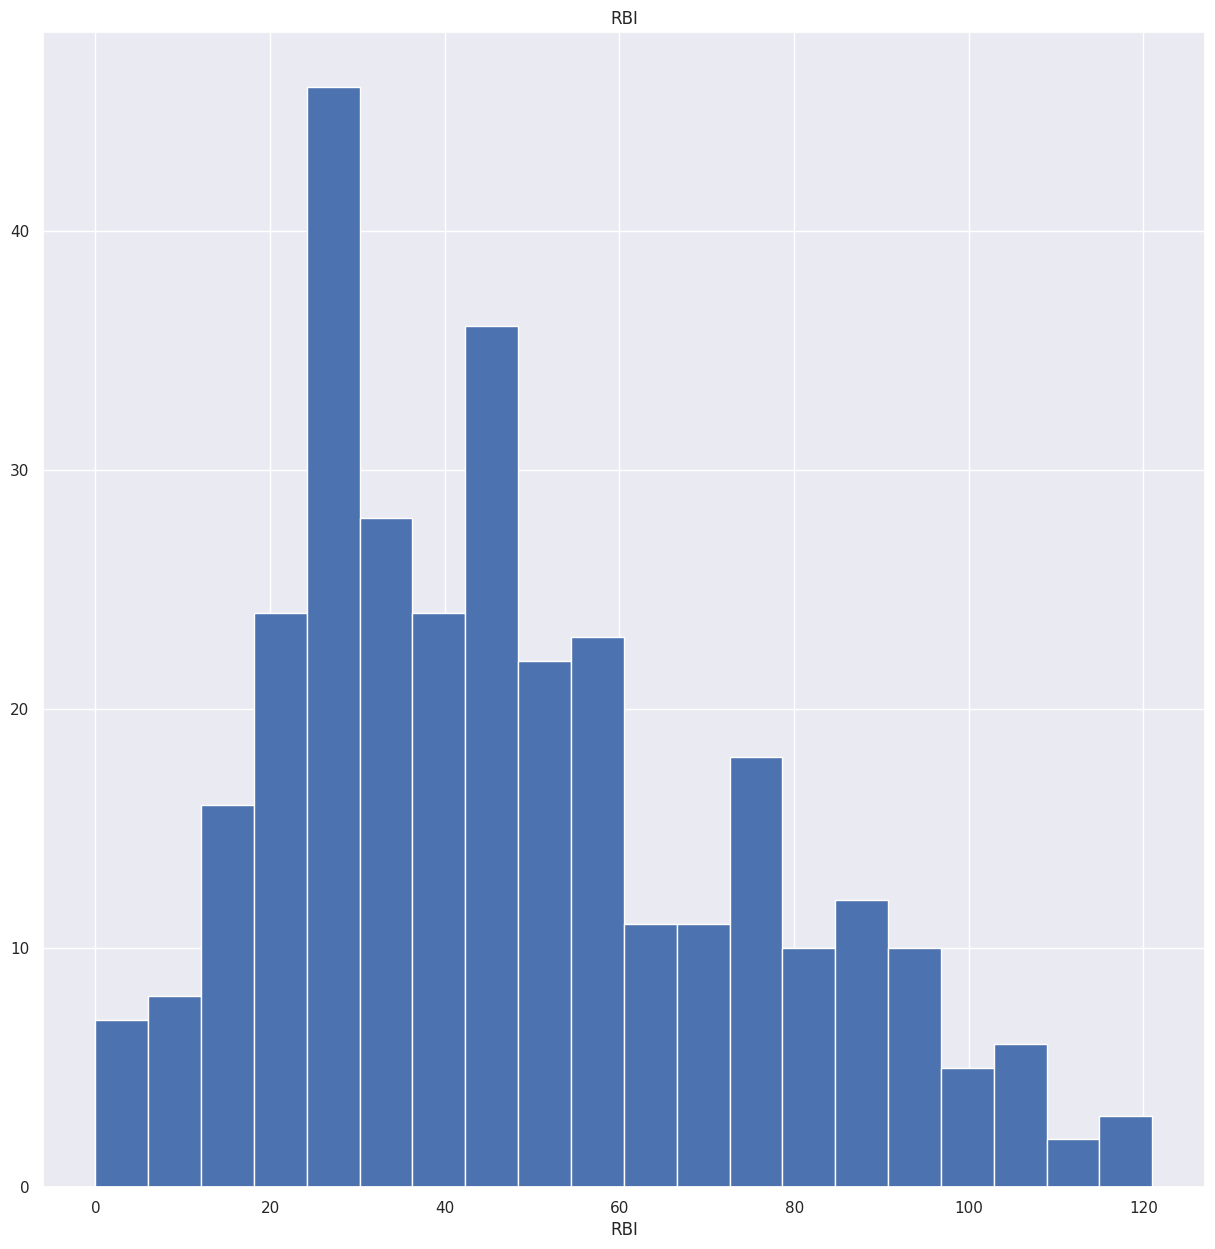

count   322.00
mean     38.74
std      21.64
min       0.00
5%       11.05
10%      15.00
20%      20.00
30%      24.00
40%      30.00
50%      35.00
60%      40.00
70%      48.70
80%      59.00
90%      69.90
95%      78.00
99%      93.58
max     105.00
Name: Walks, dtype: float64


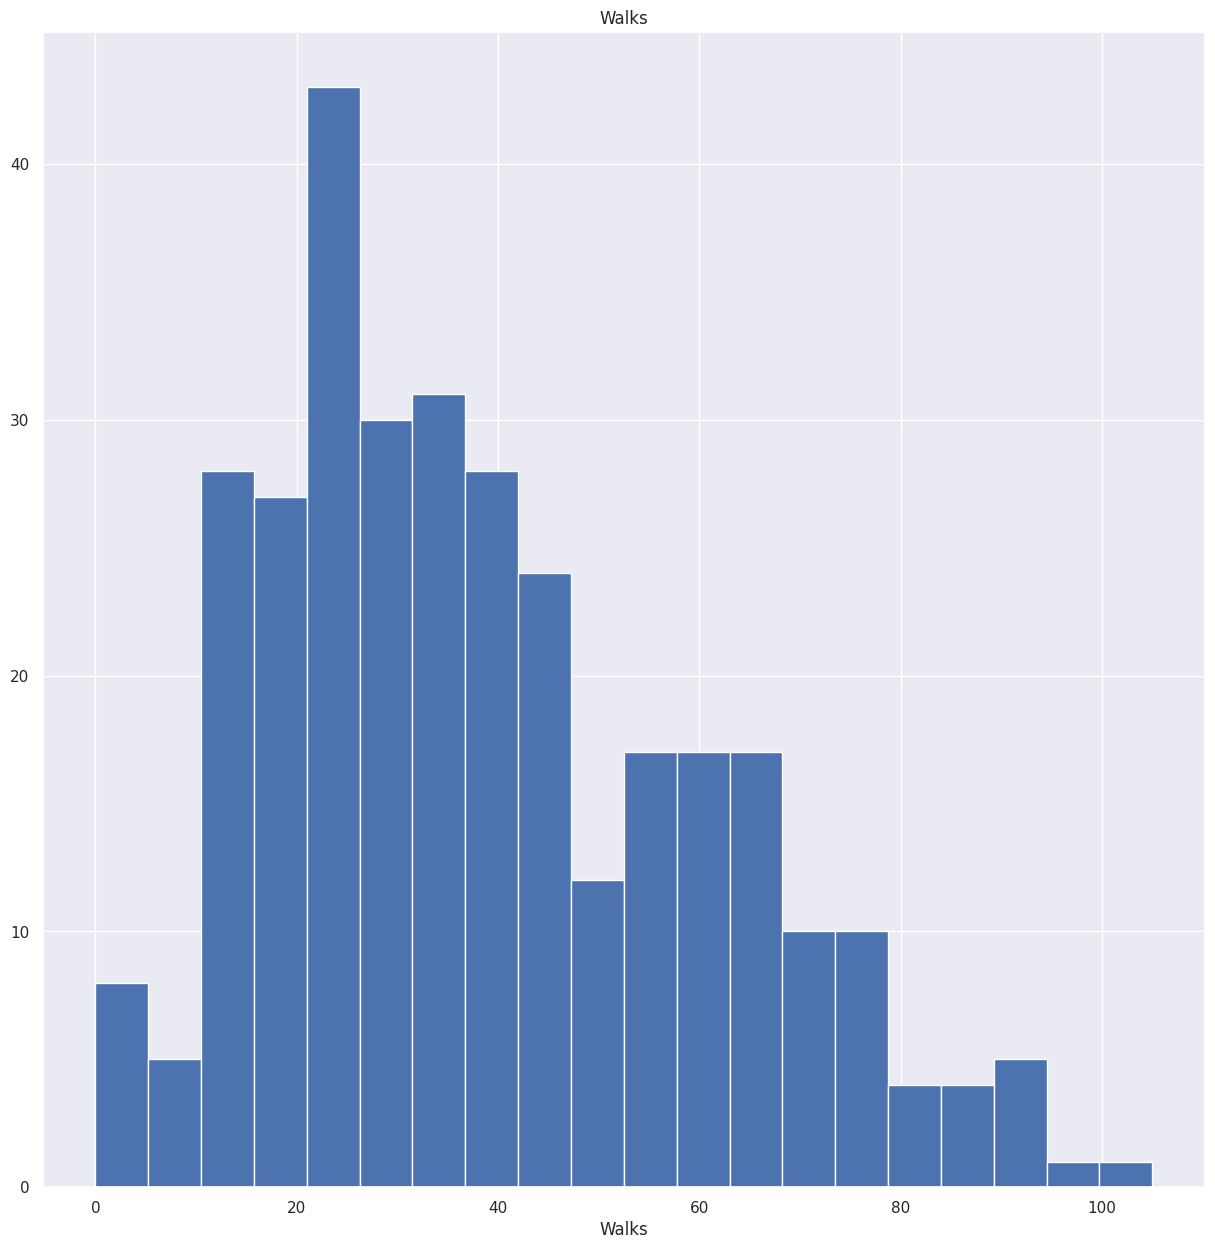

count   322.00
mean      7.44
std       4.93
min       1.00
5%        1.00
10%       2.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       7.60
70%      10.00
80%      12.00
90%      15.00
95%      17.00
99%      19.79
max      24.00
Name: Years, dtype: float64


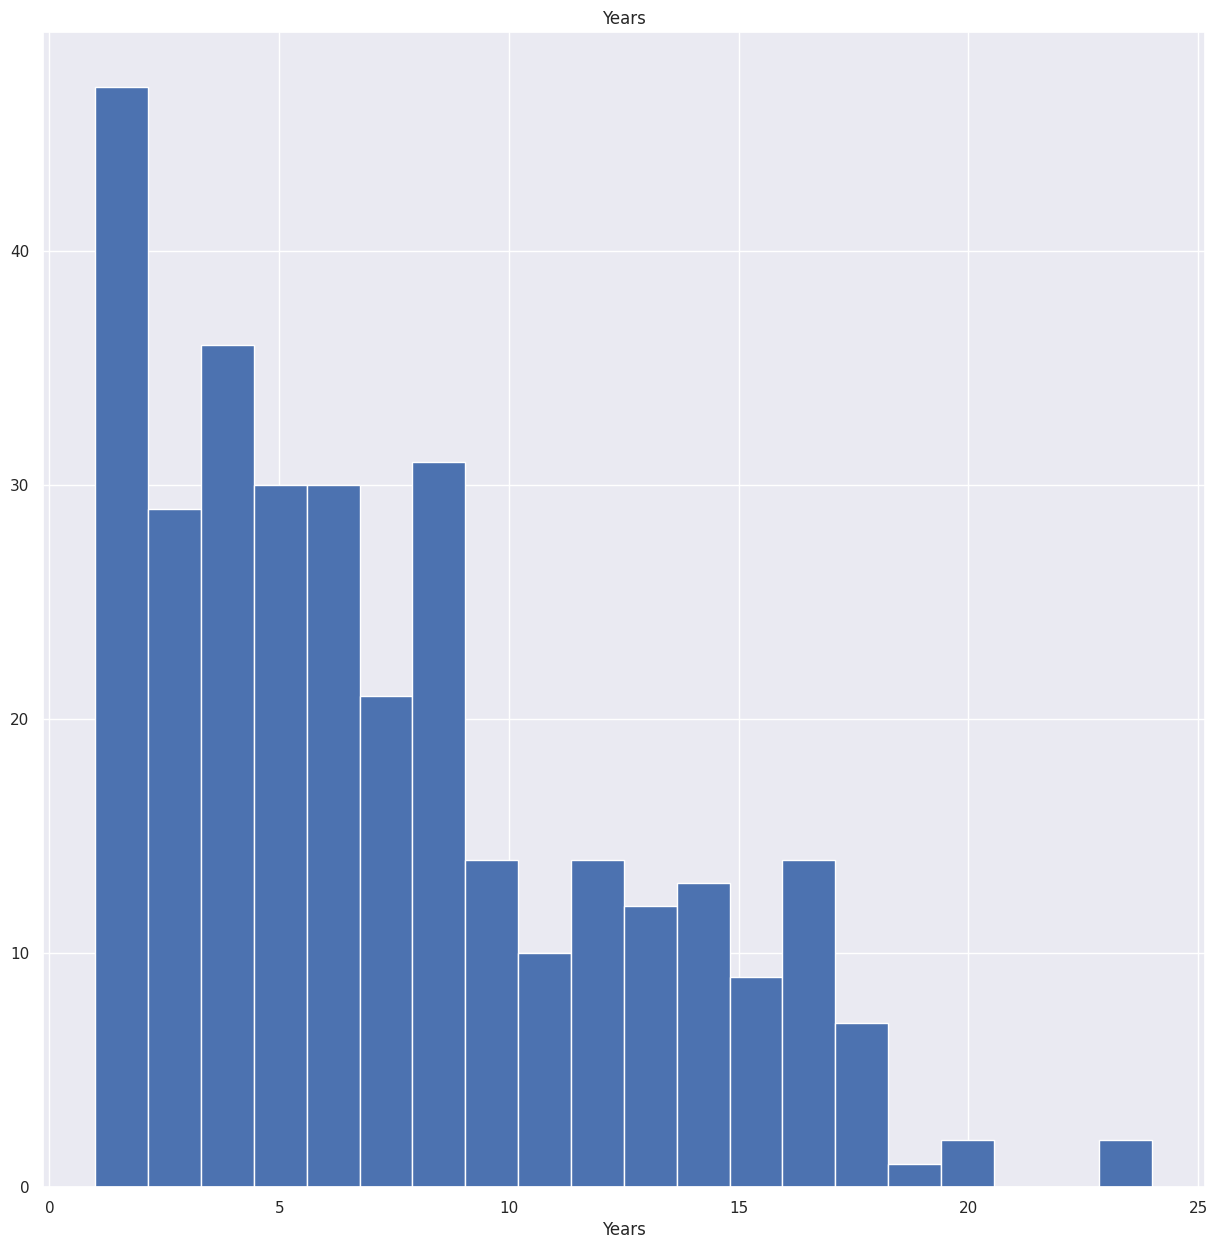

count     322.00
mean     2648.68
std      2324.21
min        19.00
5%        216.50
10%       342.20
20%       667.60
30%       963.40
40%      1402.20
50%      1928.00
60%      2654.00
70%      3365.00
80%      4483.00
90%      6123.40
95%      7125.60
99%      8749.97
max     14053.00
Name: CAtBat, dtype: float64


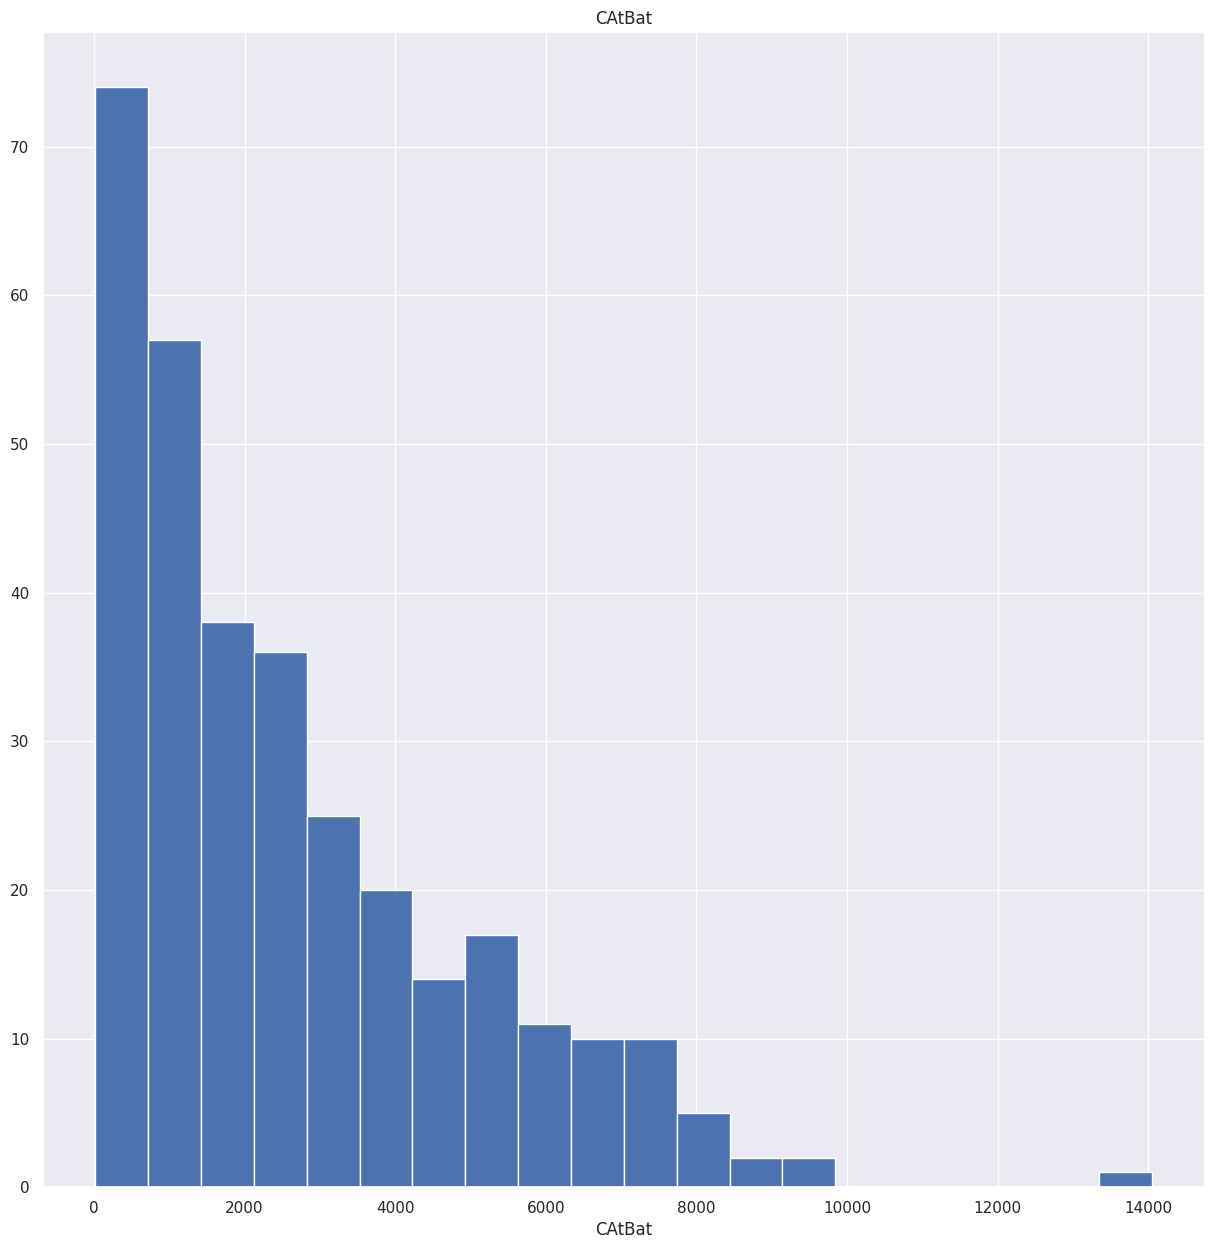

count    322.00
mean     716.84
std      650.62
min        4.00
5%        54.00
10%       86.00
20%      164.60
30%      238.00
40%      355.80
50%      508.00
60%      708.20
70%      911.10
80%     1229.20
90%     1659.60
95%     2017.15
99%     2500.34
max     4020.00
Name: CHits, dtype: float64


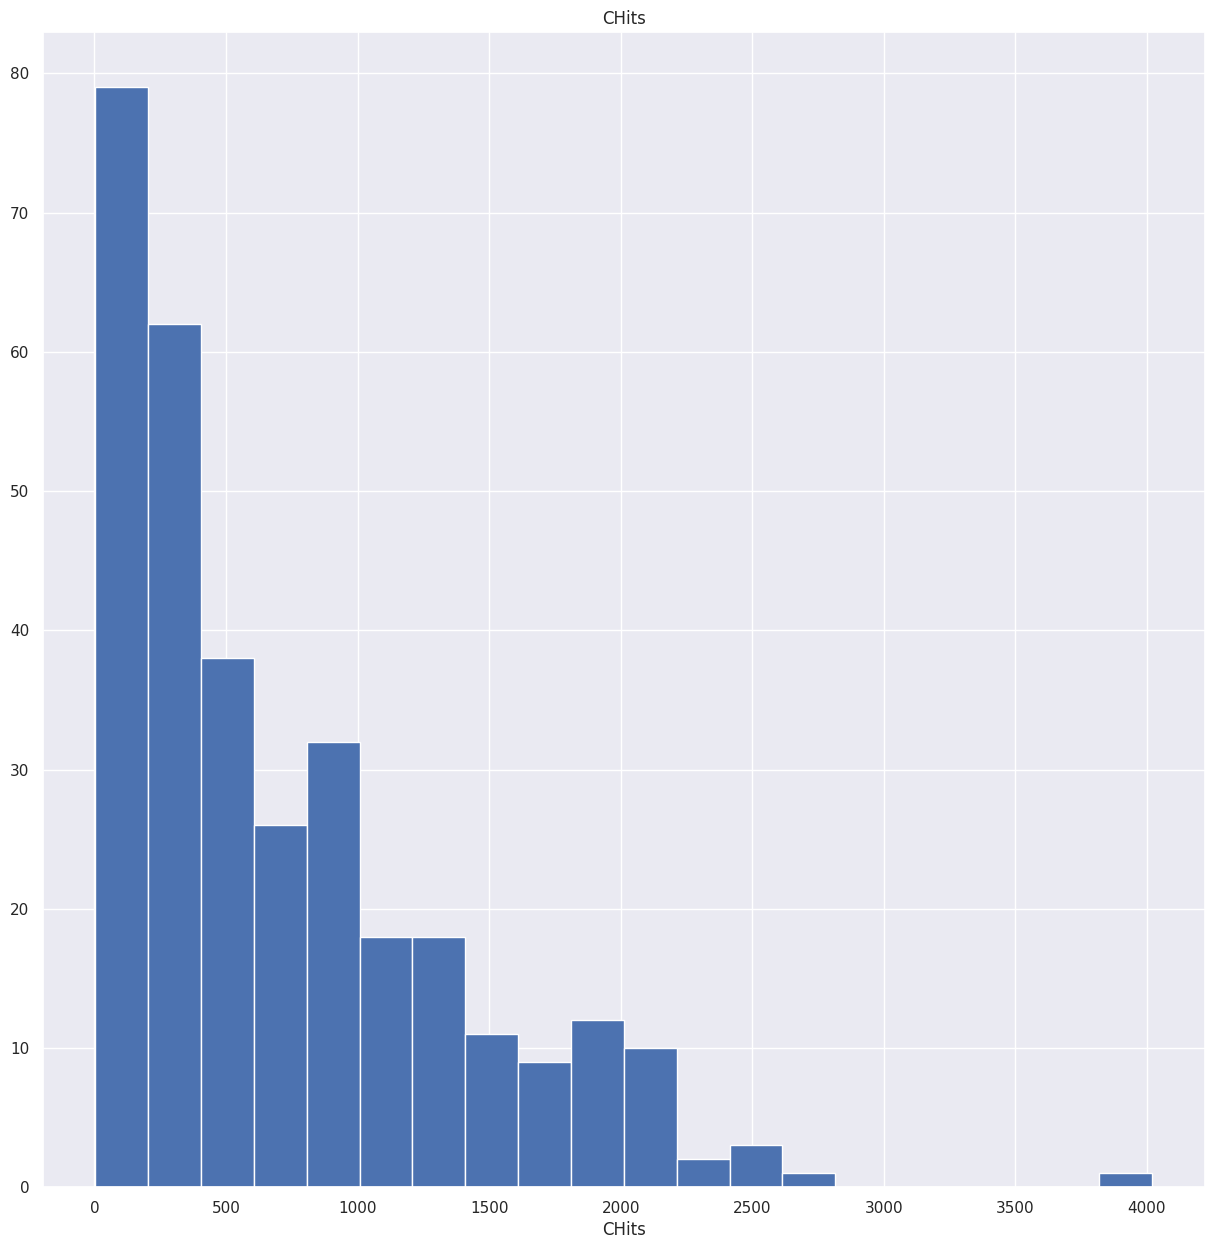

count   322.00
mean     69.28
std      85.19
min       0.00
5%        2.00
10%       4.00
20%      10.20
30%      16.30
40%      27.40
50%      37.50
60%      51.20
70%      72.40
80%     103.80
90%     194.90
95%     265.65
99%     373.12
max     481.25
Name: CHmRun, dtype: float64


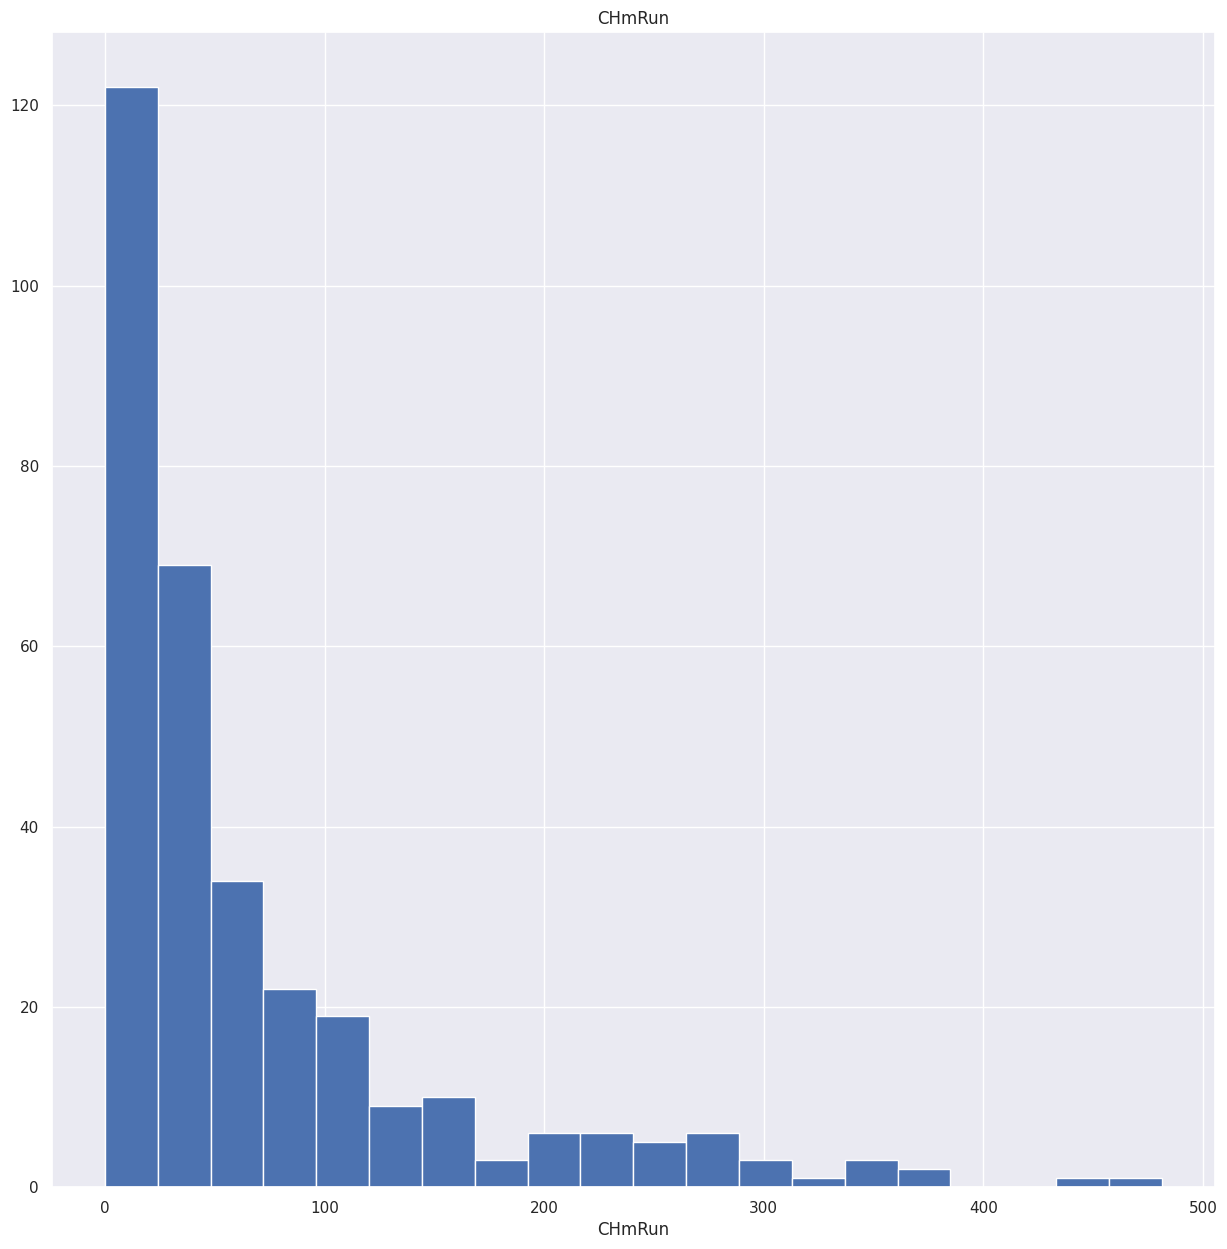

count    322.00
mean     358.80
std      334.11
min        1.00
5%        27.00
10%       38.10
20%       80.40
30%      117.30
40%      181.00
50%      247.00
60%      333.00
70%      443.40
80%      627.20
90%      895.70
95%     1032.30
99%     1174.37
max     2165.00
Name: CRuns, dtype: float64


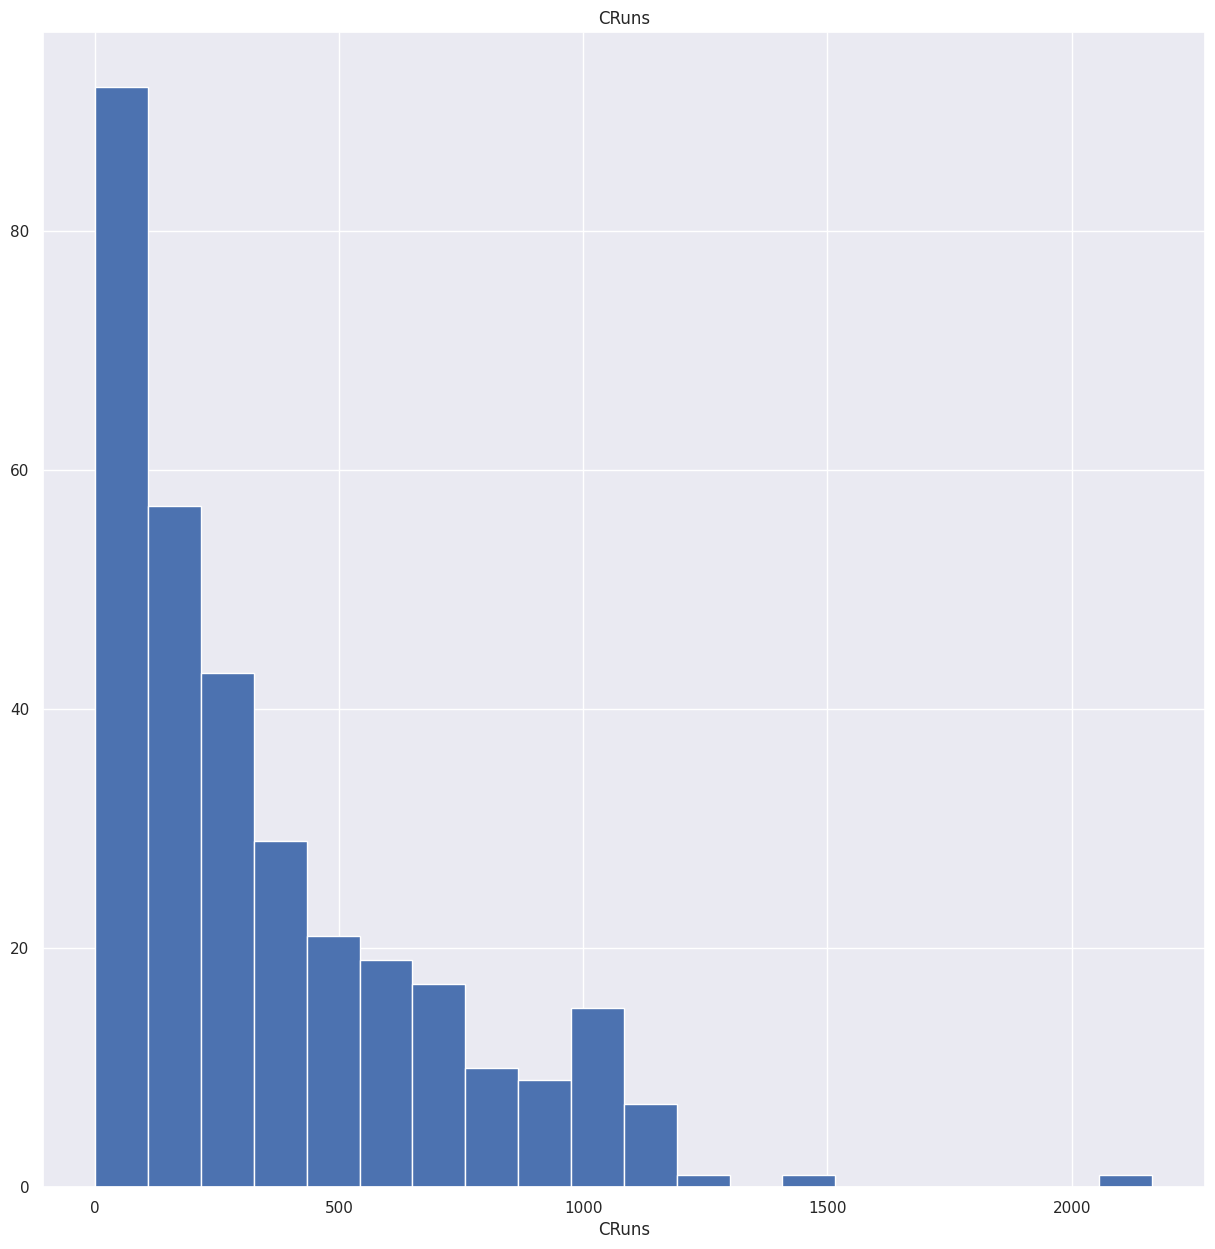

count    322.00
mean     330.12
std      333.22
min        0.00
5%        22.05
10%       34.10
20%       70.20
30%      106.30
40%      149.00
50%      220.50
60%      303.60
70%      379.10
80%      496.20
90%      861.60
95%     1071.75
99%     1310.85
max     1659.00
Name: CRBI, dtype: float64


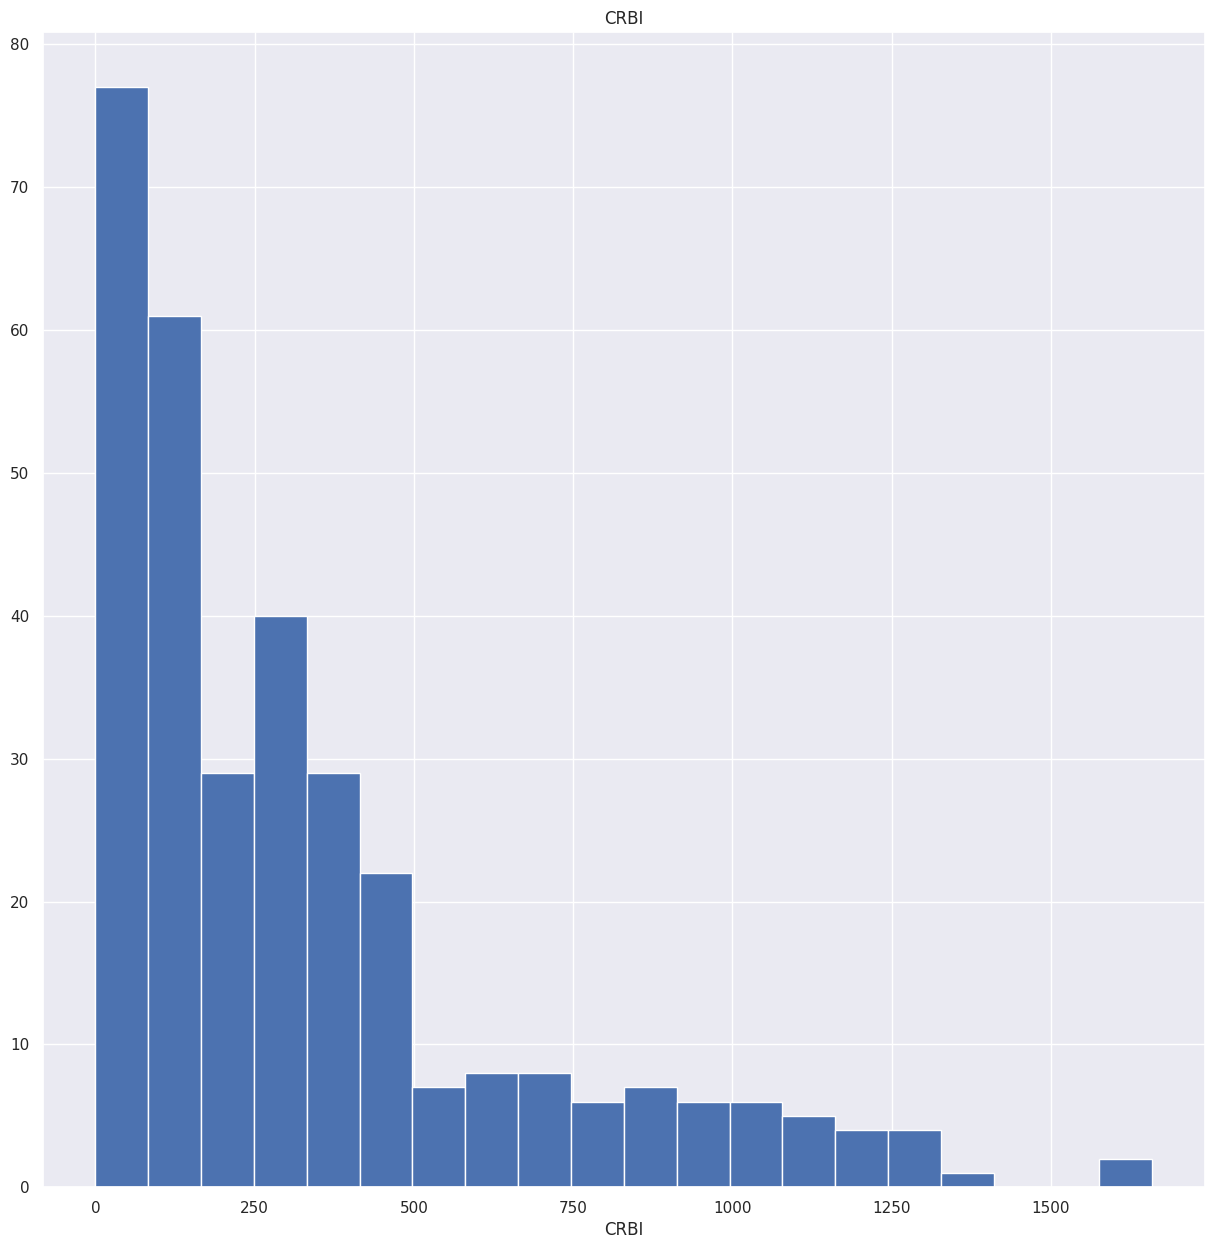

count    322.00
mean     260.23
std      267.04
min        0.00
5%        15.05
10%       30.10
20%       55.00
30%       82.00
40%      117.40
50%      170.50
60%      226.60
70%      300.70
80%      421.00
90%      643.90
95%      817.60
99%     1139.14
max     1564.60
Name: CWalks, dtype: float64


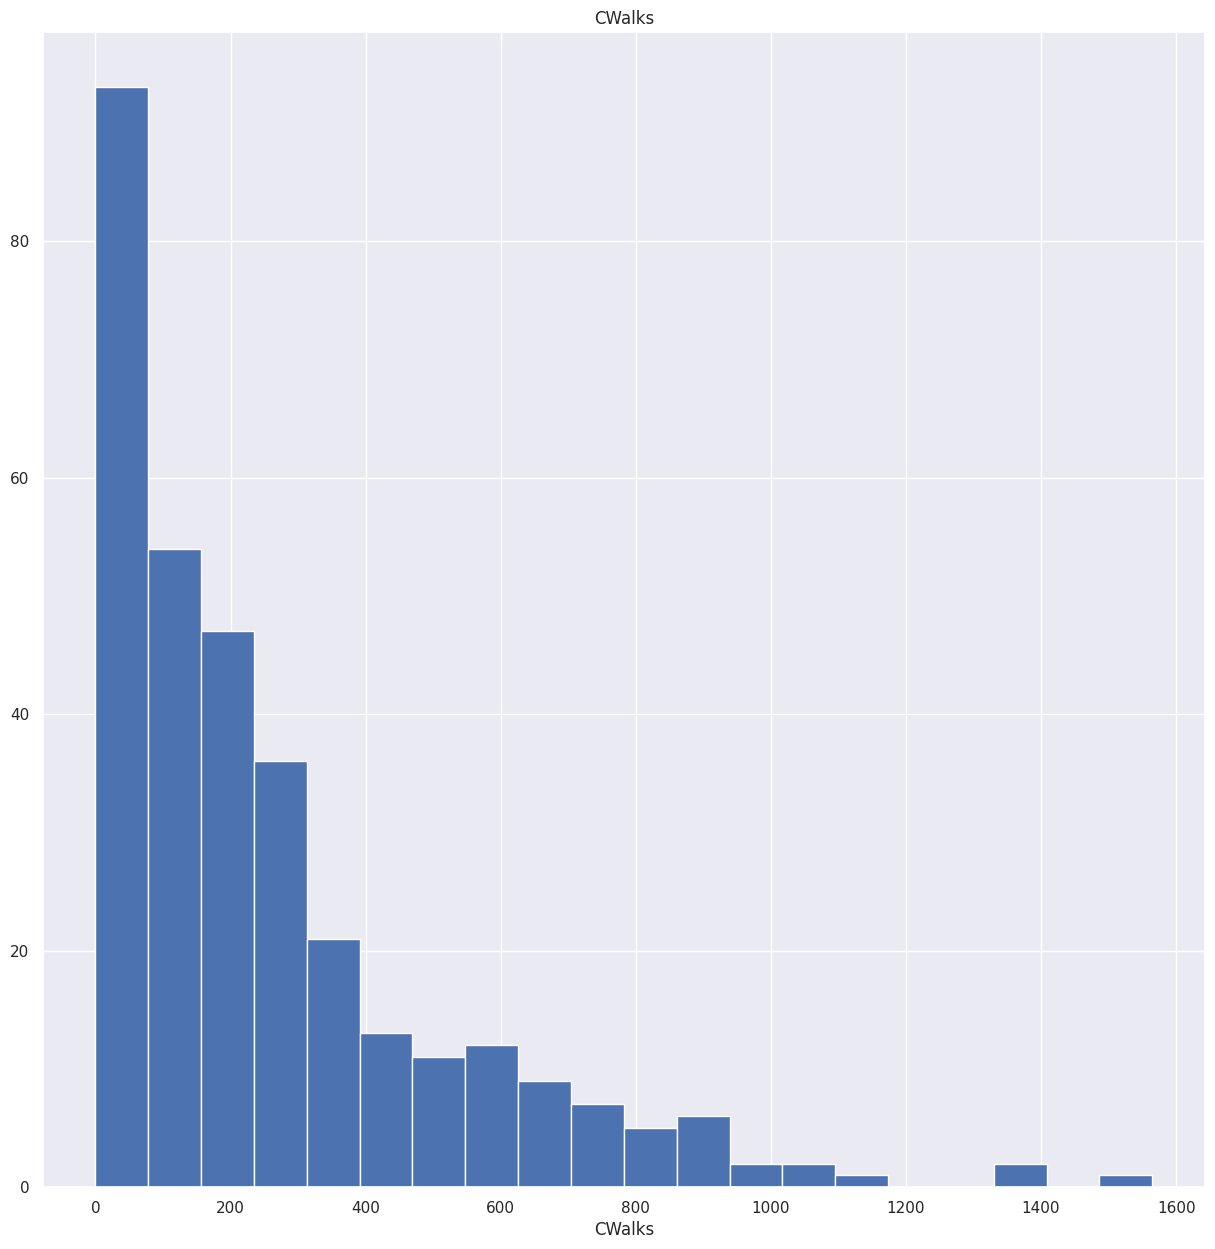

count    322.00
mean     288.94
std      280.70
min        0.00
5%        33.20
10%       62.20
20%       99.60
30%      132.00
40%      167.00
50%      212.00
60%      257.40
70%      303.00
80%      365.80
90%      685.60
95%      910.65
99%     1301.19
max     1378.00
Name: PutOuts, dtype: float64


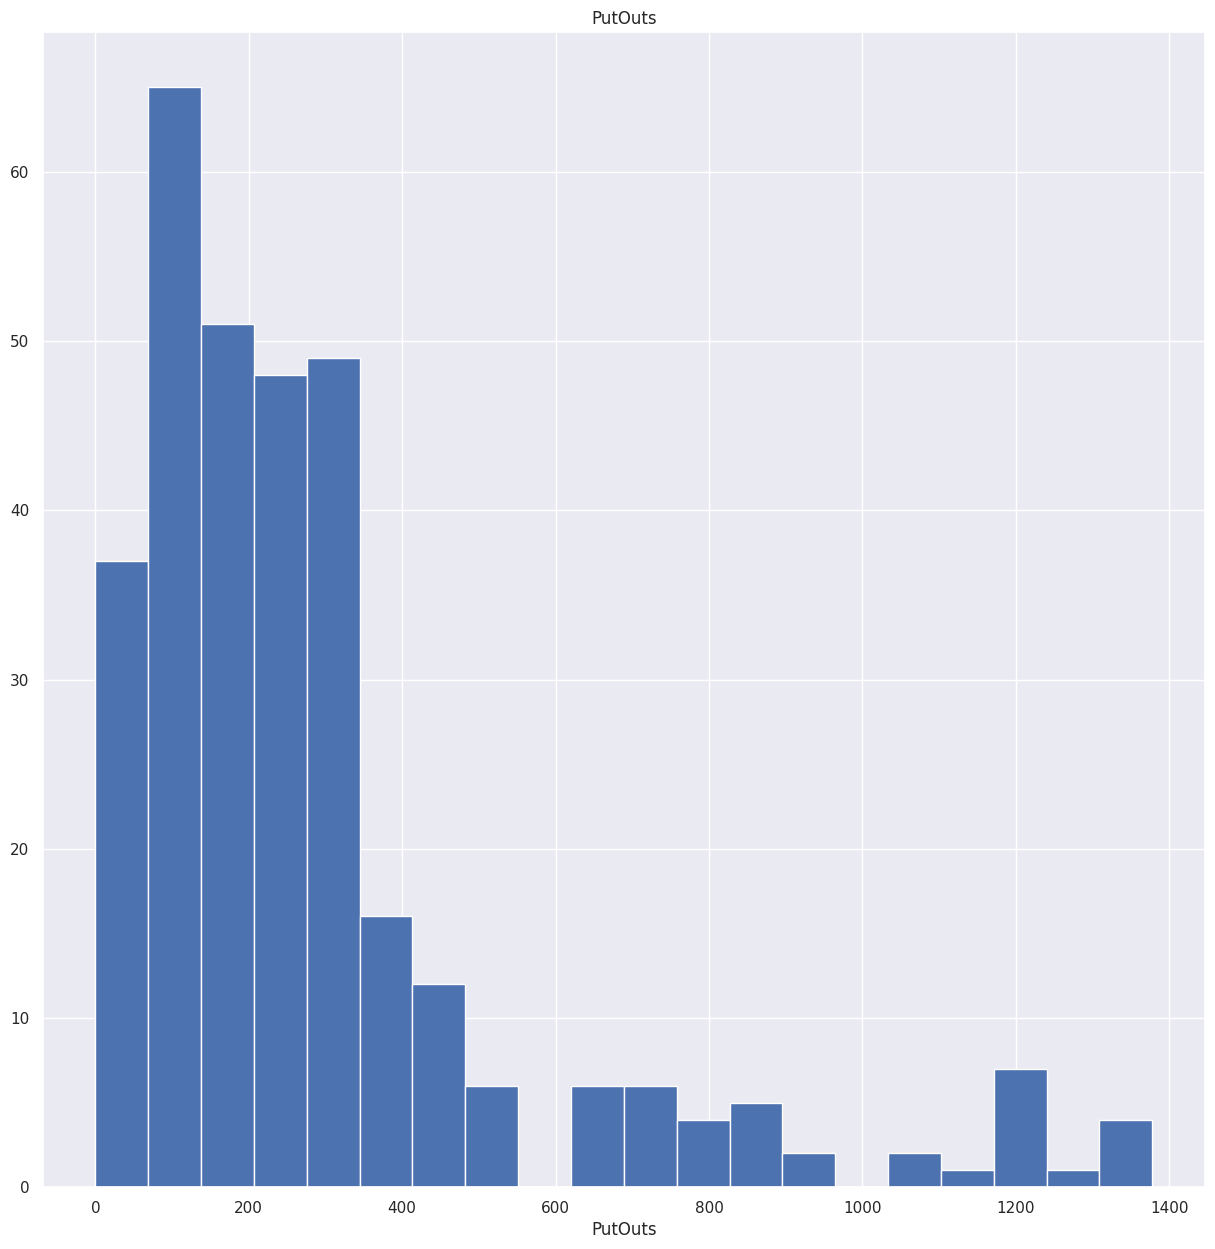

count   322.00
mean    106.91
std     136.85
min       0.00
5%        0.00
10%       2.00
20%       5.20
30%       9.00
40%      15.40
50%      39.50
60%      76.80
70%     134.80
80%     210.80
90%     353.30
95%     431.45
99%     478.16
max     492.00
Name: Assists, dtype: float64


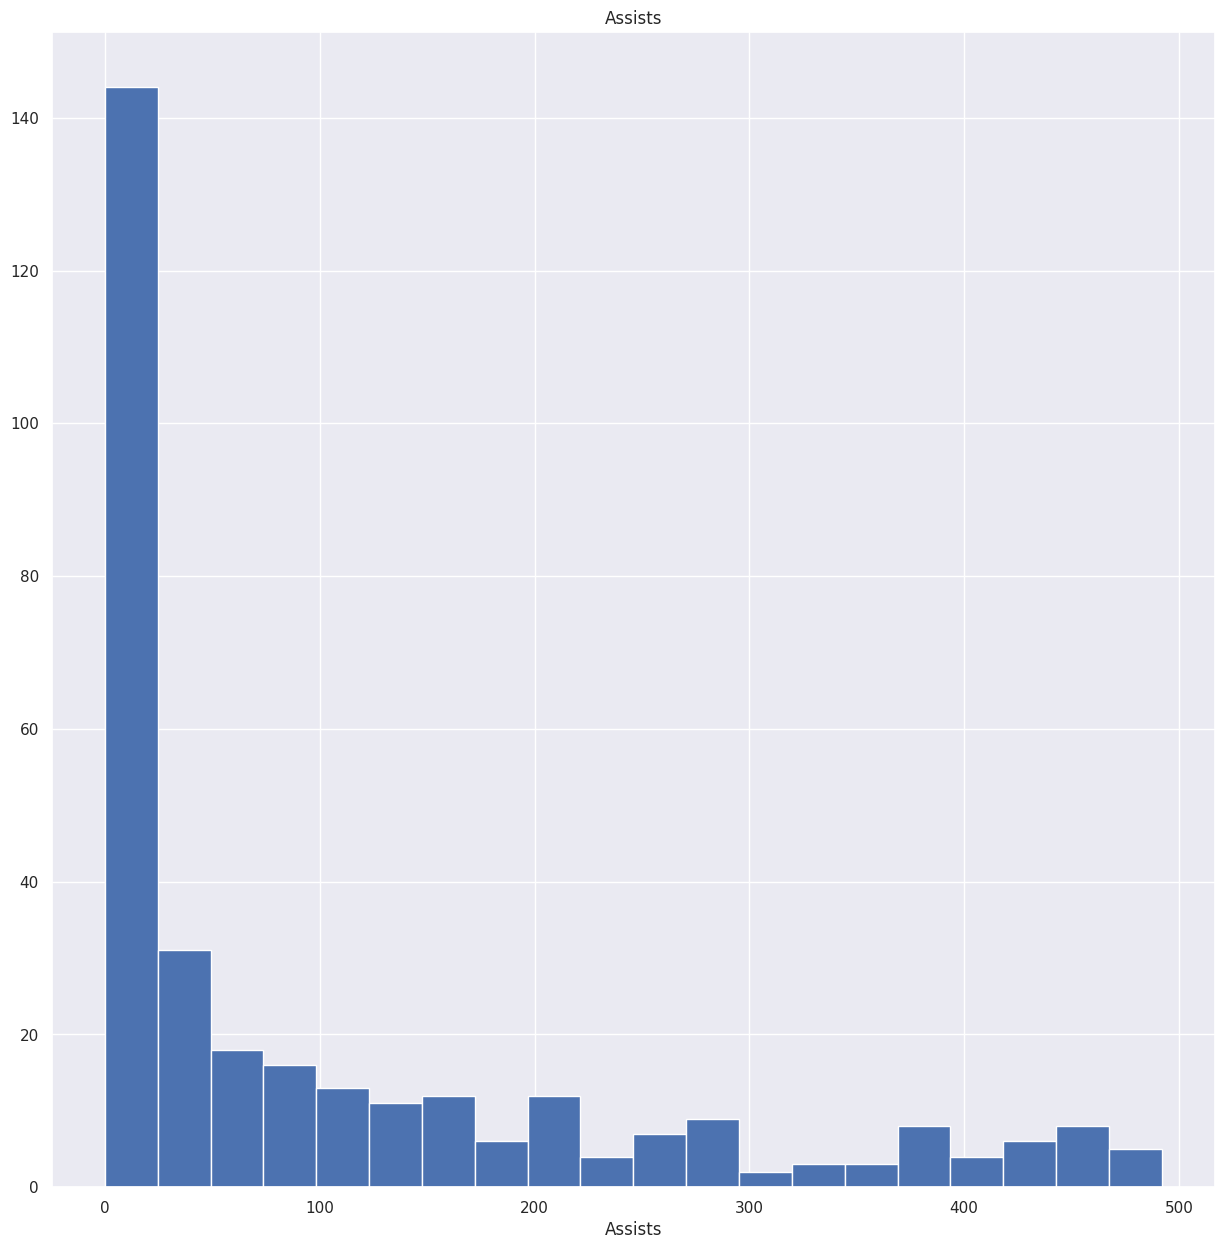

count   322.00
mean      8.04
std       6.37
min       0.00
5%        0.00
10%       1.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       8.00
70%      10.00
80%      13.00
90%      17.00
95%      20.00
99%      25.79
max      32.00
Name: Errors, dtype: float64


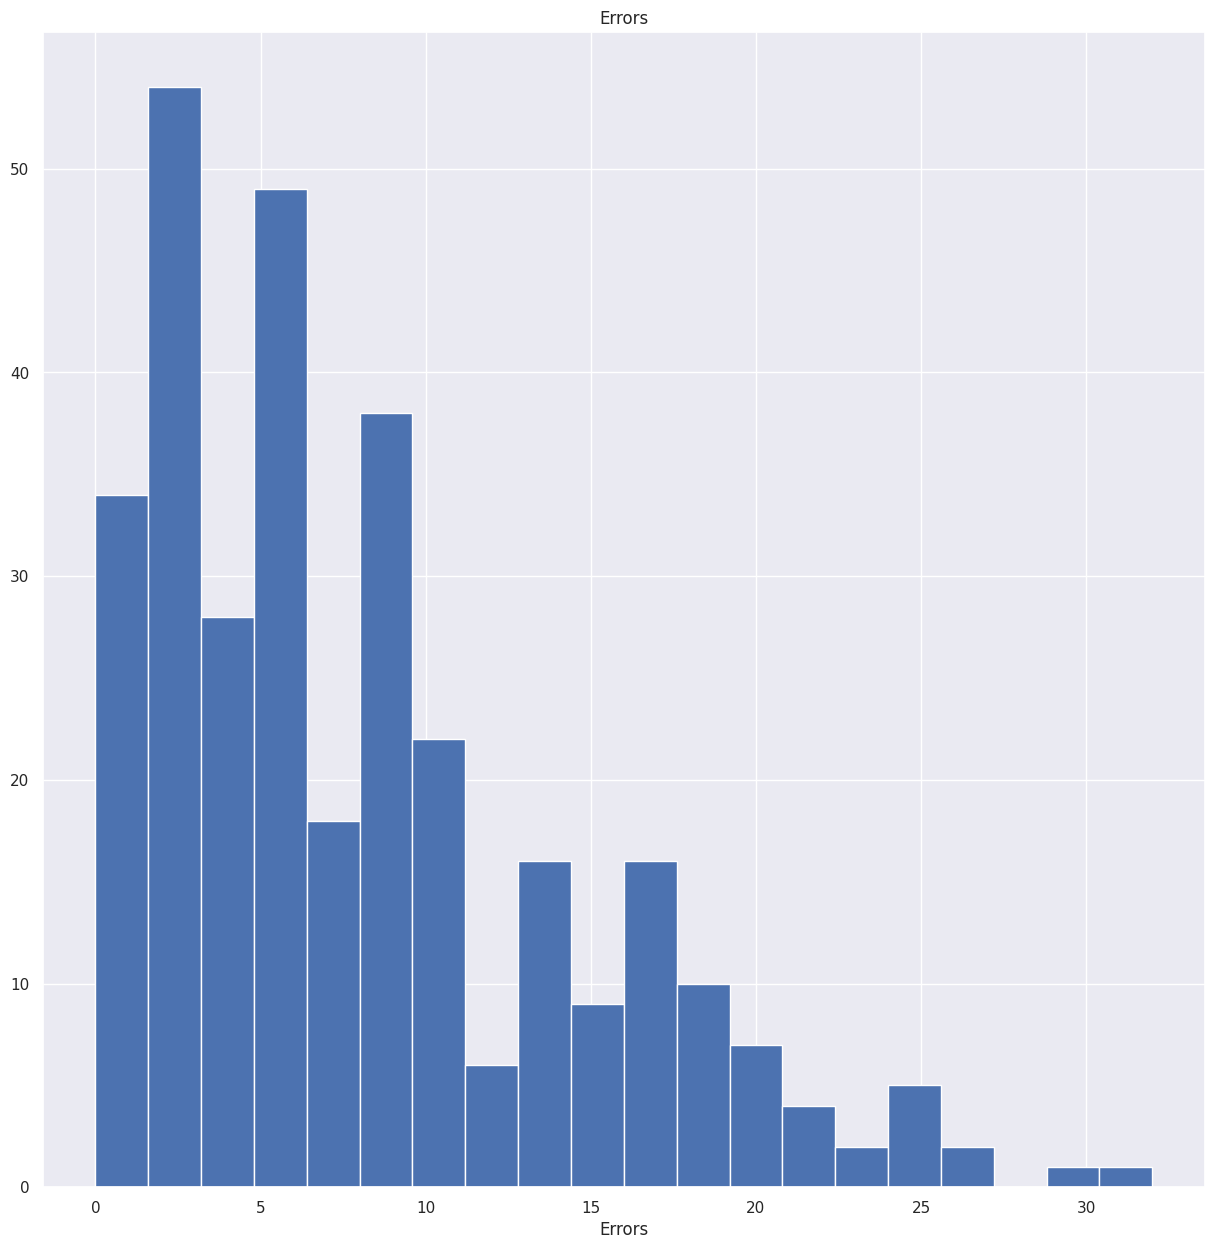

count    263.00
mean     535.93
std      451.12
min       67.50
5%        86.60
10%      100.00
20%      155.00
30%      221.00
40%      300.00
50%      425.00
60%      538.00
70%      700.00
80%      809.00
90%     1048.67
95%     1346.00
99%     2032.89
max     2460.00
Name: Salary, dtype: float64


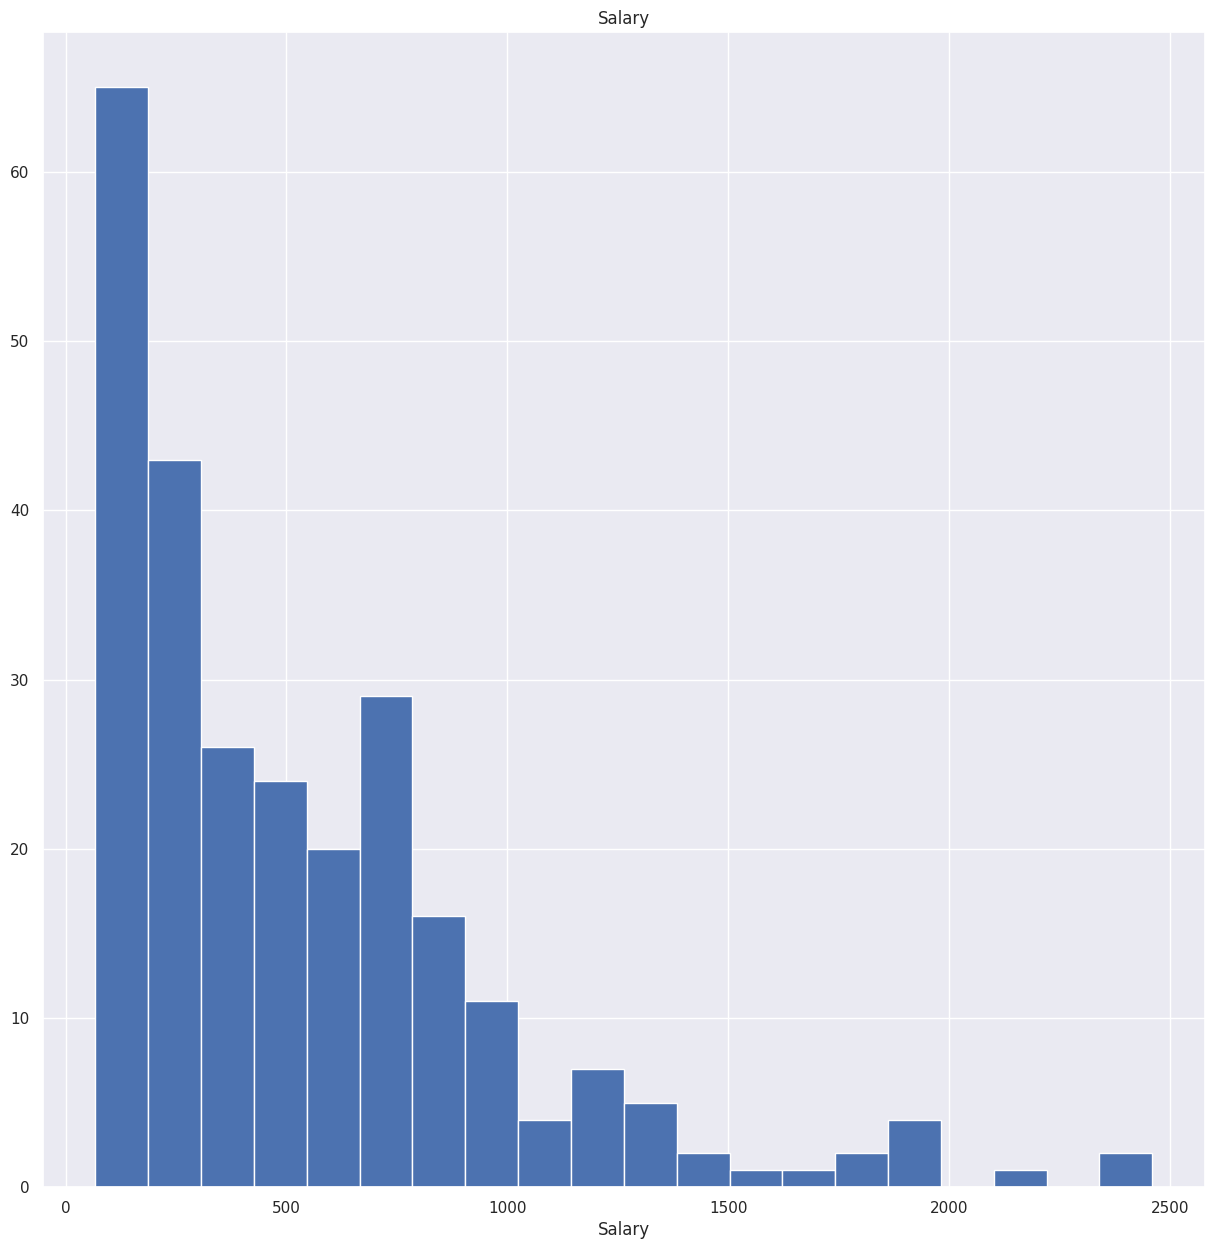

In [ ]:
# Analysis of Numerical Variables (Sayısal Değişken Analizi )

for col in num_cols:
    num_summary(df, col, plot=True)

In [ ]:
# Analysis of Target Variable (Hedef Değişken Analizi)

for col in cat_cols:
    target_summary_with_cat(df, "Salary", col)

        TARGET_MEAN
League             
A            542.00
N            529.12


          TARGET_MEAN
Division             
E              624.27
W              450.88


           TARGET_MEAN
NewLeague             
A               537.11
N               534.55




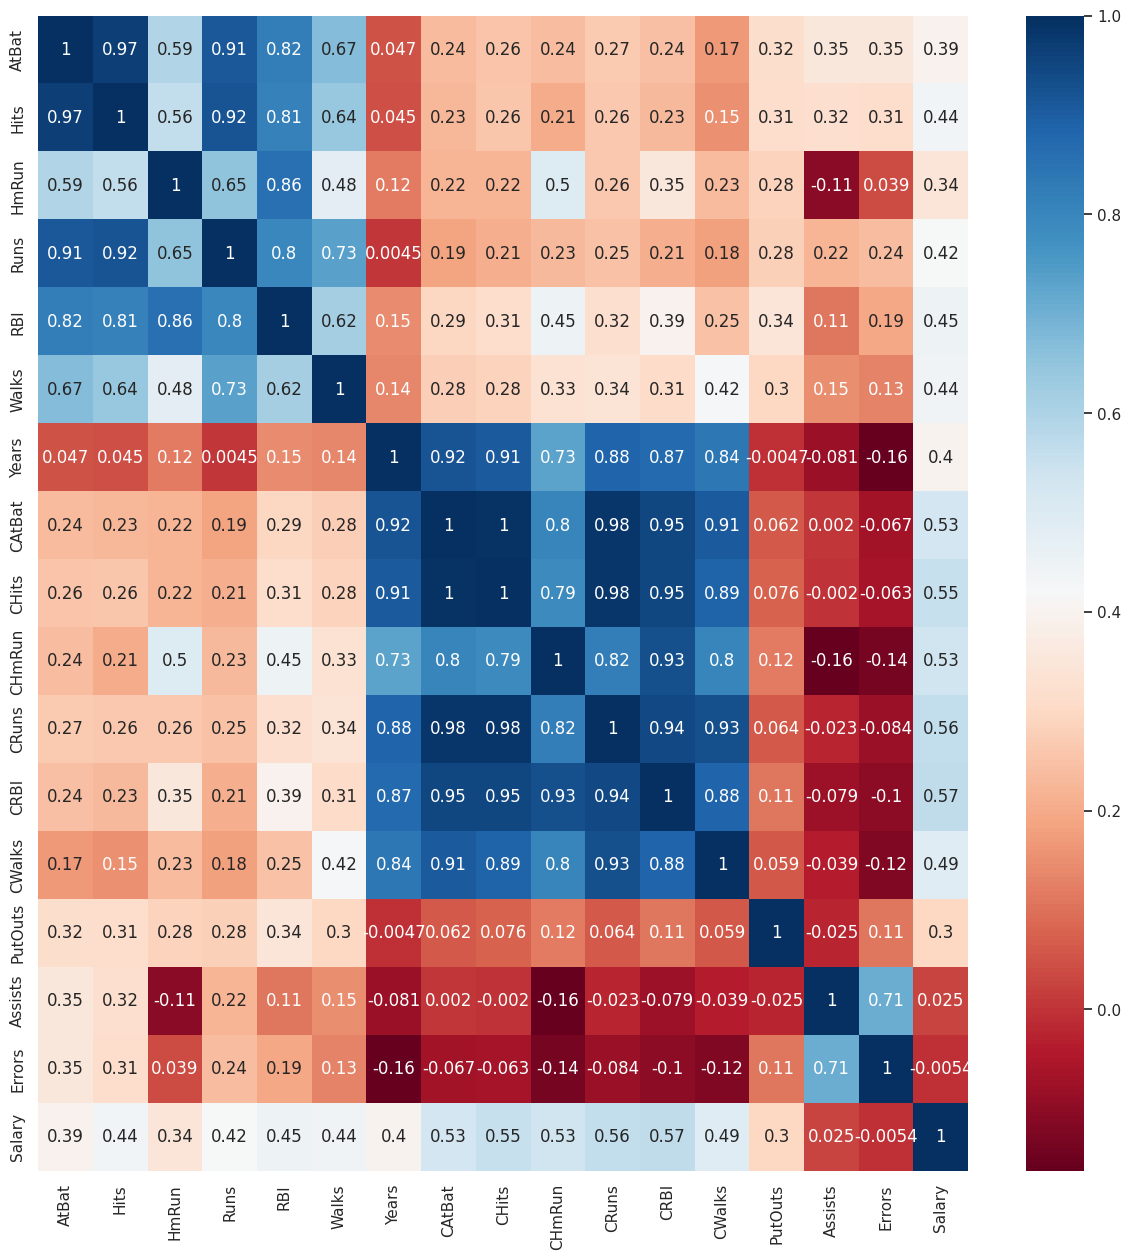

['Hits', 'Runs', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

In [ ]:
# Analysis of Correlation (Korelasyon Analizi)

high_correlated_cols(df, plot=True)

In [ ]:
# 2. Missing Values (Eksik Değerler)

In [ ]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [ ]:
#NOT: Bağımlı değişkenimizdeki eksik değerleri doldurursak yanlılığa sebep oluruz.
# Bu yüzden bağımlı değişkendeki eksik değerler doldurulmaz. Drop işlemi uygulanır.

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [ ]:
# 3. Feature Extraction (Özellik Çıkarımı)

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 263
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [ ]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [ ]:
new_num_cols = [col for col in num_cols if col not in ["Salary", "Years"]]
df[new_num_cols] = df[new_num_cols] + 1    # ZeroDivisionError almamak için 1 ekledik.

In [ ]:
df.columns = [col.upper() for col in df.columns]

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [ ]:
# RATIO OF VARIABLES

# CAREER RUNS RATIO
df["NEW_C_RUNS_RATIO"] = df["RUNS"] / df["CRUNS"]
# CAREER BAT RATIO
df["NEW_C_ATBAT_RATIO"] = df["ATBAT"] / df["CATBAT"]
# CAREER HITS RATIO
df["NEW_C_HITS_RATIO"] = df["HITS"] / df["CHITS"]
# CAREER HMRUN RATIO
df["NEW_C_HMRUN_RATIO"] = df["HMRUN"] / df["CHMRUN"]
# CAREER RBI RATIO
df["NEW_C_RBI_RATIO"] = df["RBI"] / df["CRBI"]
# CAREER WALKS RATIO
df["NEW_C_WALKS_RATIO"] = df["WALKS"] / df["CWALKS"]
df["NEW_C_HIT_RATE"] = df["CHITS"] / df["CATBAT"]
# PLAYER TYPE : RUNNER
df["NEW_C_RUNNER"] = df["CRBI"] / df["CHITS"]
# PLAYER TYPE : HIT AND RUN
df["NEW_C_HIT-AND-RUN"] = df["CRUNS"] / df["CHITS"]
# MOST VALUABLE HIT RATIO IN HITS
df["NEW_C_HMHITS_RATIO"] = df["CHMRUN"] / df["CHITS"]
# MOST VALUABLE HIT RATIO IN ALL SHOTS
df["NEW_C_HMATBAT_RATIO"] = df["CATBAT"] / df["CHMRUN"]

In [ ]:
#ANNUAL AVERAGES
df["NEW_CATBAT_MEAN"] = df["CATBAT"] / df["YEARS"]
df["NEW_CHITS_MEAN"] = df["CHITS"] / df["YEARS"]
df["NEW_CHMRUN_MEAN"] = df["CHMRUN"] / df["YEARS"]
df["NEW_CRUNS_MEAN"] = df["CRUNS"] / df["YEARS"]
df["NEW_CRBI_MEAN"] = df["CRBI"] / df["YEARS"]
df["NEW_CWALKS_MEAN"] = df["CWALKS"] / df["YEARS"]

In [ ]:
# PLAYER LEVEL
df.loc[(df["YEARS"] <= 2), "NEW_YEARS_LEVEL"] = "Junior"
df.loc[(df["YEARS"] > 2) & (df['YEARS'] <= 5), "NEW_YEARS_LEVEL"] = "Mid"
df.loc[(df["YEARS"] > 5) & (df['YEARS'] <= 10), "NEW_YEARS_LEVEL"] = "Senior"
df.loc[(df["YEARS"] > 10), "NEW_YEARS_LEVEL"] = "Expert"

In [ ]:
# PLAYER LEVEL X DIVISION
df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Junior-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Junior-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Mid-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Mid-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Senior-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Senior-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Expert-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Expert-West"

In [ ]:
# Player Promotion to Next League
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "StandN"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "StandA"
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "Descend"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "Ascend"


In [ ]:
print(num_cols)
print(cat_cols)

['ATBAT', 'HITS', 'HMRUN', 'RUNS', 'RBI', 'WALKS', 'YEARS', 'CATBAT', 'CHITS', 'CHMRUN', 'CRUNS', 'CRBI', 'CWALKS', 'PUTOUTS', 'ASSISTS', 'ERRORS', 'SALARY']
['LEAGUE', 'DIVISION', 'NEWLEAGUE']


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 40
cat_cols: 6
num_cols: 34
cat_but_car: 0
num_but_cat: 0


In [ ]:
# 4. Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)

In [ ]:
# NOT: Encoding kısmında veriyi makine öğrenmesi modelimizin anlayacağı dile getireceğiz.

In [ ]:
# Label Encoding

binary_cols = [col for col in df.columns if
               df[col].dtype not in [int, float] and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

In [ ]:
# Rare Encoding

rare_analyser(df,"SALARY", cat_cols)
df = rare_encoder(df, 0.01, cat_cols)

LEAGUE : 2
   COUNT  RATIO  TARGET_MEAN
0    139   0.53       542.00
1    124   0.47       529.12


DIVISION : 2
   COUNT  RATIO  TARGET_MEAN
0    129   0.49       624.27
1    134   0.51       450.88


NEWLEAGUE : 2
   COUNT  RATIO  TARGET_MEAN
0    141   0.54       537.11
1    122   0.46       534.55


NEW_YEARS_LEVEL : 4
        COUNT  RATIO  TARGET_MEAN
Expert     65   0.25       755.11
Junior     38   0.14       186.92
Mid        78   0.30       359.34
Senior     82   0.31       691.89


NEW_DIV_CAT : 8
             COUNT  RATIO  TARGET_MEAN
Expert-East     32   0.12       809.78
Expert-West     33   0.13       702.10
Junior-East     16   0.06       229.30
Junior-West     22   0.08       156.09
Mid-East        37   0.14       427.91
Mid-West        41   0.16       297.46
Senior-East     44   0.17       798.11
Senior-West     38   0.14       568.90


NEW_PLAYER_PROGRESS : 4
         COUNT  RATIO  TARGET_MEAN
Ascend       8   0.03       558.12
Descend     10   0.04       486.00
Stand

In [ ]:
# One-Hot Encoding

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
df = one_hot_encoder(df, ohe_cols, drop_first=True)
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols.remove("SALARY")

Observations: 263
Variables: 50
cat_cols: 16
num_cols: 34
cat_but_car: 0
num_but_cat: 16


In [ ]:
# 5. Feature Scaling (Özellik Ölçeklendirme)

In [ ]:
# NOT: Verileri scaler etmemizin amacı verilerimizi aynı ölçekte görmek ve küçük sayılarla çalışıp performansı arttırmak.

In [ ]:
# Robust-Scaler

for col in num_cols:
    transformer = RobustScaler().fit(df[[col]])
    df[col] = transformer.transform(df[[col]])

In [ ]:
# Multiple Linear Regression

In [ ]:
X = df.drop("SALARY", axis=1)
y = df[["SALARY"]]

In [ ]:
print(X)
print(y)

     ATBAT  HITS  HMRUN  RUNS   RBI  WALKS  YEARS  CATBAT  CHITS  CHMRUN  ...  \
1    -0.40 -0.31  -0.15 -0.71 -0.22   0.06   1.33    0.50   0.38    0.37  ...   
2     0.27  0.39   0.69  0.35  0.61   1.15  -0.50   -0.10  -0.07    0.30  ...   
3     0.34  0.54   0.85  0.33  0.76   0.00   0.83    1.21   1.26    2.39  ...   
4    -0.38 -0.23   0.08 -0.33 -0.12  -0.21  -0.67   -0.50  -0.49   -0.36  ...   
5     0.74  0.94  -0.38  0.56  0.10  -0.06   0.83    0.81   0.73   -0.27  ...   
..     ...   ...    ...   ...   ...    ...    ...     ...    ...     ...  ...   
317   0.34  0.34  -0.15  0.33  0.02   0.00  -0.17    0.25   0.34   -0.10  ...   
318   0.32  0.47  -0.31  0.61  0.07   1.68   1.00    1.17   1.18   -0.01  ...   
319   0.25  0.33  -0.46  0.23 -0.10   0.44   0.00   -0.08  -0.10   -0.43  ...   
320   0.66  0.59   0.00  0.84  0.32   1.21   0.33    0.42   0.40    0.74  ...   
321   0.90  0.96   0.00  0.63 -0.07  -0.18   0.83    0.98   1.12   -0.13  ...   

     NEW_DIV_CAT_Expert-Wes

In [ ]:
# Model

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1) # Holdout yöntemi

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# b + w*x

In [ ]:
# sabit (b - bias)
reg_model.intercept_

array([655.76466015])

In [ ]:
# coefficients (w - weights)
reg_model.coef_

array([[-2.45997926e+02,  2.19272219e+02, -1.05385575e+02,
         1.47336579e+02,  1.10859322e+02,  4.32869838e+01,
        -3.02517824e+02, -1.10356788e+03,  1.74893421e+03,
         2.94324414e+02, -3.28619013e+02, -4.08426082e+02,
         1.05960189e+02, -1.93076828e+01, -7.03900036e+01,
         3.55076090e+01, -3.54670064e+01,  6.26213136e+01,
         4.23854891e+01, -3.15027673e+02,  1.25470910e+03,
        -1.05470783e+03,  7.98095426e+01, -2.88847140e+02,
        -4.25060562e+01, -1.85472986e+02, -1.79538629e+00,
        -2.76695076e+01, -5.94720503e+01,  1.36426473e+01,
        -1.28642956e+03,  7.74855474e+02,  1.84776526e+01,
         2.73035290e+02,  3.30396695e+02, -2.22179798e+01,
        -3.34730834e+01, -1.48627902e+02, -2.45509691e+01,
         1.07972576e+00, -2.63490781e+01, -7.12400530e+00,
        -1.10935926e+02, -3.76919756e+01,  2.10277936e+00,
        -2.66537485e+01, -1.73738702e+01, -2.50116189e+01,
        -1.93381263e+00]])

In [ ]:
#linear regression y_hat = b + w*x
np.inner(X_train.iloc[2, :].values ,reg_model.coef_) + reg_model.intercept_  #tahmini değer

array([666.59242302])

In [ ]:
y_train.iloc[2]    # gerçek değer

SALARY   600.00
Name: 23, dtype: float64

In [ ]:
np.inner(X_train.iloc[4, :].values ,reg_model.coef_) + reg_model.intercept_   #tahmini değer

array([399.2367075])

In [ ]:
y_train.iloc[4]    # gerçek değer

SALARY   245.00
Name: 297, dtype: float64

In [ ]:
# Prediction Success Evaluation (Tahmin Başarısını Değerlendirme)

In [ ]:
# Train RMSE
y_pred = reg_model.predict(X_train)
y_pred


array([[ 725.44833825],
       [ 515.56494409],
       [ 666.59242302],
       [ 994.19364669],
       [ 399.2367075 ],
       [ 468.01240261],
       [ 307.60873475],
       [1332.88404237],
       [ 169.22876908],
       [ 501.85427965],
       [ 140.1035946 ],
       [1151.69450865],
       [ 384.82366983],
       [ 666.6434435 ],
       [ 637.07364795],
       [ -41.85352225],
       [ 265.51202819],
       [ 368.78252066],
       [ 273.96237391],
       [ 418.51339039],
       [ 450.55209415],
       [ 357.42747881],
       [ 459.84018744],
       [ 888.28534687],
       [ 219.35109331],
       [ 346.11982844],
       [ 916.4399419 ],
       [ 687.84738398],
       [  61.02619427],
       [ 559.33459697],
       [ 284.78951561],
       [ 687.00083379],
       [ 680.00924101],
       [ 271.73682696],
       [ 170.17038288],
       [ 649.49685182],
       [ 891.93842792],
       [ 852.63804523],
       [  17.39204623],
       [ 509.58073672],
       [ 939.29405717],
       [ 698.976

In [ ]:
np.sqrt(mean_squared_error(y_train, y_pred))
# smape = mean_absolute_error(y_train, y_pred) / y_train.mean()

204.71646456823612

In [ ]:
# TRAIN RKARE
reg_model.score(X_train, y_train)

0.786256577366203

In [ ]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

369.05264021458134

In [ ]:
# Test RKARE
reg_model.score(X_test, y_test)
#0.40 çıkması underfitting olabilir anlamına geliyor yada train veri setinde öğrenemeyeceği veriler test veri setinin içinde yer almış olabilir.
#bu yüzden cross validation kullanıyoruz.

0.40532551579631815

In [ ]:
# 10 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X, y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

296.73540504555416